In [1]:
from astropy.io import fits
import os

from sklearn import preprocessing
import shutil
from astropy.timeseries import LombScargle
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import optimize
from scipy.interpolate import CubicSpline
from scipy.integrate import simps
from scipy.interpolate import UnivariateSpline
from scipy.ndimage import gaussian_filter
import scipy.signal as signal
from astropy.time import Time
import pandas as pd
from lmfit import Model
from PyAstronomy.pyasl import foldAt
from scipy.optimize import curve_fit
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from scipy.ndimage.filters import uniform_filter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import lightkurve as lk
from pylab import rc
from matplotlib import gridspec
from matplotlib import transforms
from matplotlib import colors
from scipy.stats import gaussian_kde
from pylab import *
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Times']
from scipy.optimize import leastsq
from gatspy import periodic
plt.rc('xtick',c='w')
plt.rc('ytick',c='w')

/home/nwal/anaconda3/lib/python3.7/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


In [2]:
def foldMeth(timeArray, period):
    phases = []
    for el in timeArray:
        passed = int(el/period)
        leftover = el - (passed*period)
        phase = leftover/period
        phases.append(phase)
    return np.array(phases)

In [2]:
search_result = lk.search_lightcurvefile('GD 1400')
search_result

/home/nwal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  """Entry point for launching an IPython kernel.


SearchResult containing 5 data products.

 #     mission     year   author  exptime target_name distance
                                     s                 arcsec 
--- -------------- ---- --------- ------- ----------- --------
  0 TESS Sector 03 2018      SPOC     120   164772507      0.0
  1 TESS Sector 03 2018 TESS-SPOC    1800   164772507      0.0
  2 TESS Sector 30 2020      SPOC      20   164772507      0.0
  3 TESS Sector 30 2020      SPOC     120   164772507      0.0
  4 TESS Sector 30 2020 TESS-SPOC     600   164772507      0.0

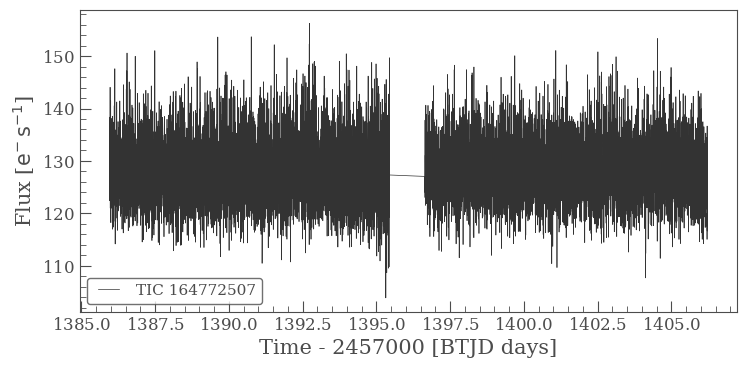

In [3]:
sec30 = search_result[0].download()
sec30.plot()

/home/nwal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  


(array([1290., 1295., 1300., 1305., 1310., 1315., 1320., 1325.]),
 <a list of 8 Text xticklabel objects>)

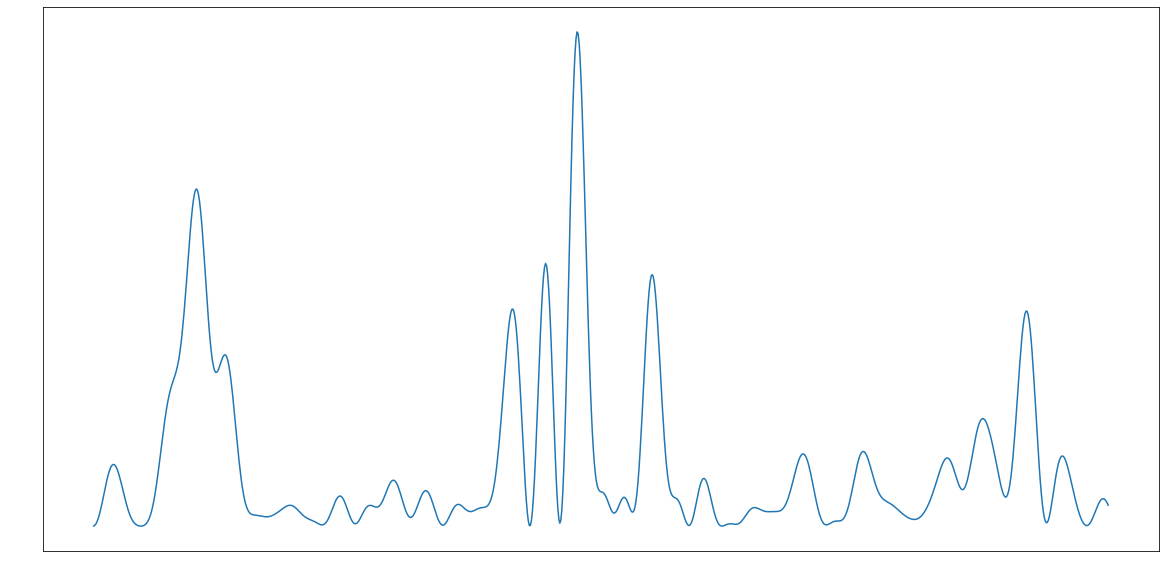

In [61]:
sec30 = search_result[0].download()
sec3 = sec30.PDCSAP_FLUX.remove_nans()
flux = sec3.flux.to_value()
time = sec3.time.mjd
time = time*24*60*60
freq = np.linspace(1295e-6, 1320e-6, 1000)
power = LombScargle(time, flux).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq*1e6,power)
#plt.plot([1305.215e-6,1305.215e-6],[0,0.007])
#plt.plot([1306.980e-6,1306.980e-6],[0,0.007])
#plt.plot([1308.724e-6,1308.724e-6],[0,0.007])
plt.xticks(fontsize=20)
#powerTess = power
#plt.xlim(5,7)

/home/nwal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  


(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 8 Text xticklabel objects>)

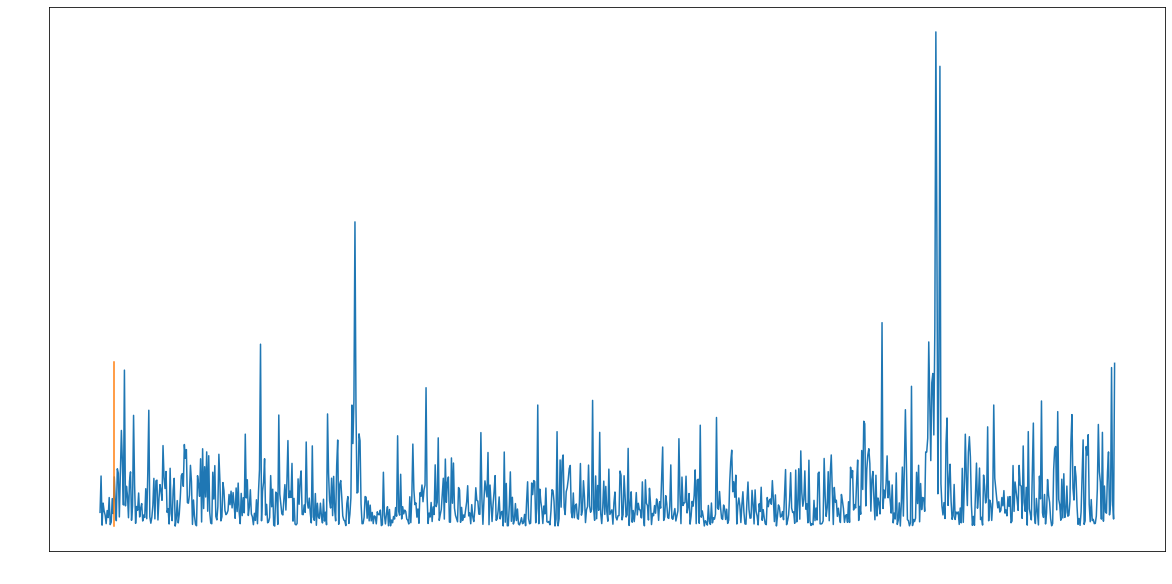

In [9]:
sec30 = search_result[0].download()
sec3 = sec30.PDCSAP_FLUX.remove_nans()
flux = sec3.flux.to_value()
time = sec3.time.mjd
time = time
freq = np.linspace(1, 100,1000)
power = LombScargle(time, flux).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power)
plt.plot([2.407221665,2.407221665], [0,0.0007])
#plt.plot([1305.215e-6,1305.215e-6],[0,0.007])
#plt.plot([1306.980e-6,1306.980e-6],[0,0.007])
#plt.plot([1308.724e-6,1308.724e-6],[0,0.007])
plt.xticks(fontsize=20)
#powerTess = power
#plt.xlim(5,7)

/home/nwal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  


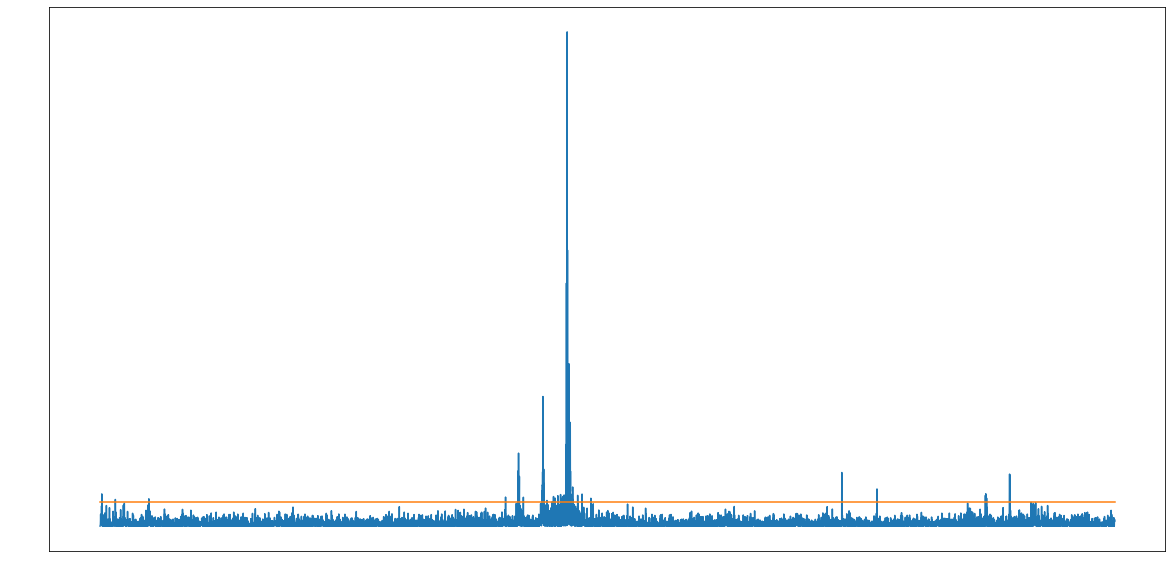

(119.3, 120.7)

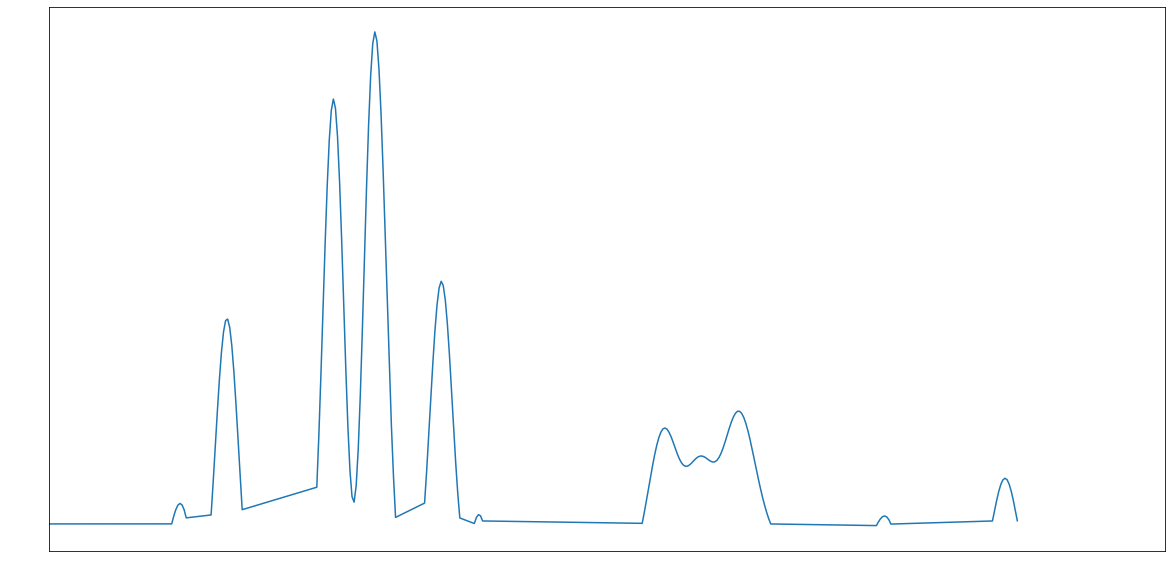

In [5]:
sec30 = search_result[2].download()
sec3 = sec30.PDCSAP_FLUX.remove_nans()
flux = sec3.flux.to_value()
time = sec3.time.mjd
time = time
freq = np.linspace(0.001, 260, 100000)
power = LombScargle(time, flux).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power)
#plt.plot([1305.215e-6,1305.215e-6],[0,0.007])
#plt.plot([1306.980e-6,1306.980e-6],[0,0.007])
#plt.plot([1308.724e-6,1308.724e-6],[0,0.007])
plt.xticks(fontsize=20)
#########plt.xlim(100,130)
#powerTess = power
#plt.xlim(5,7)
plt.plot([0.001,260],[0.0002,0.0002])
larFre = []
larPow = []
thresh=0.0005
for count, value in enumerate(power):
    if value>thresh:
        larPow.append(value)
        larFre.append(freq[count])
plt.show()
plt.figure(figsize=(20,10))
plt.plot(larFre,larPow)
plt.xlim(119.3,120.7)

In [8]:
time[-1]-time[0]

25.976661456399597/9.633179618660277

2.696582279653607

In [10]:
9.633179618660277*24/9.98

23.165963010806276

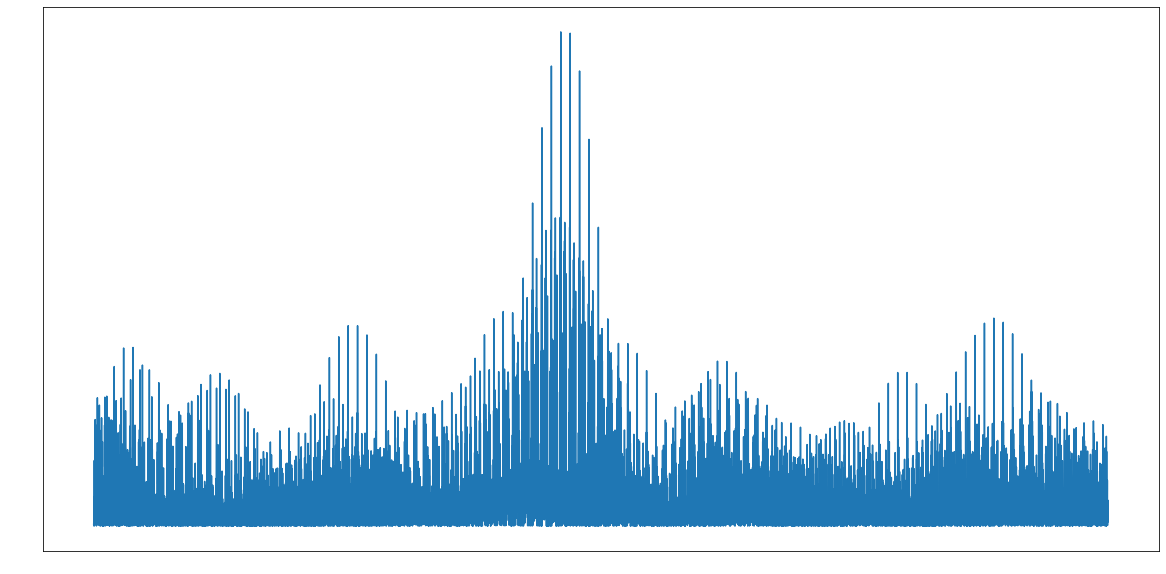

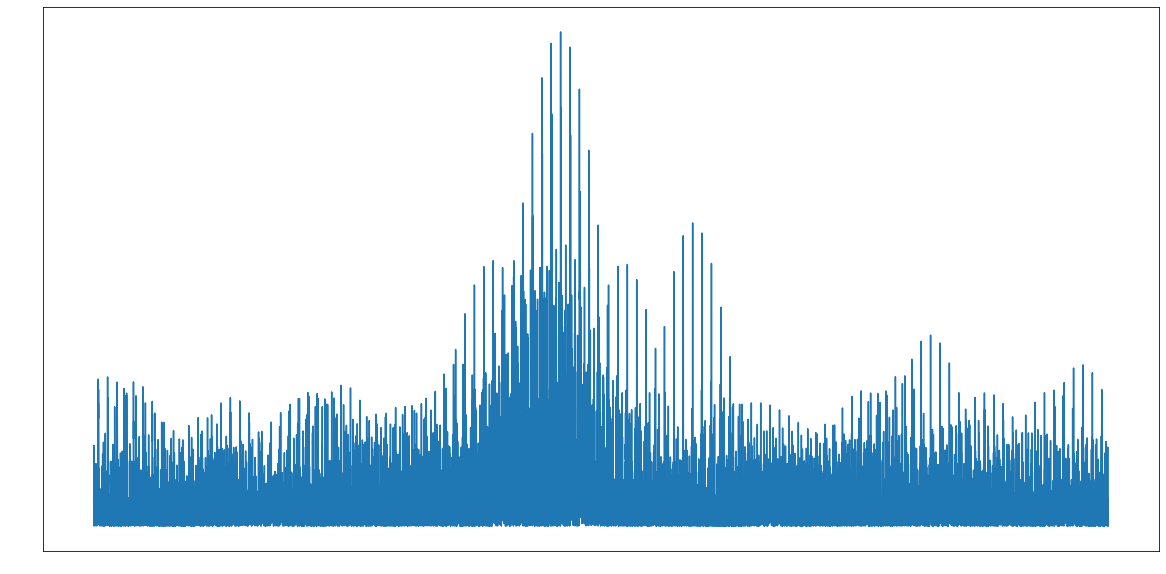

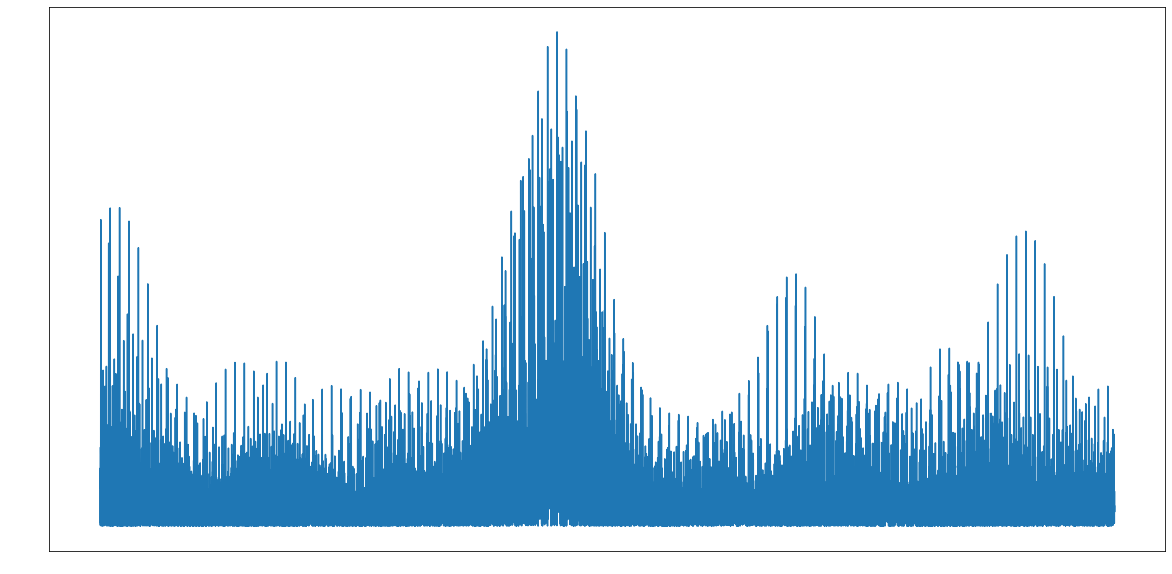

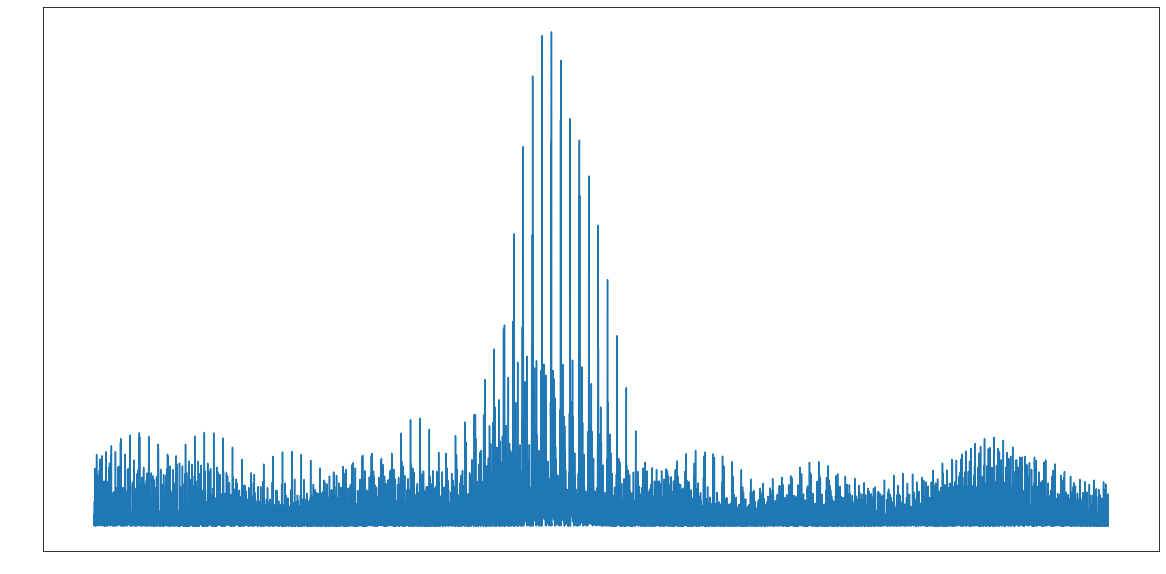

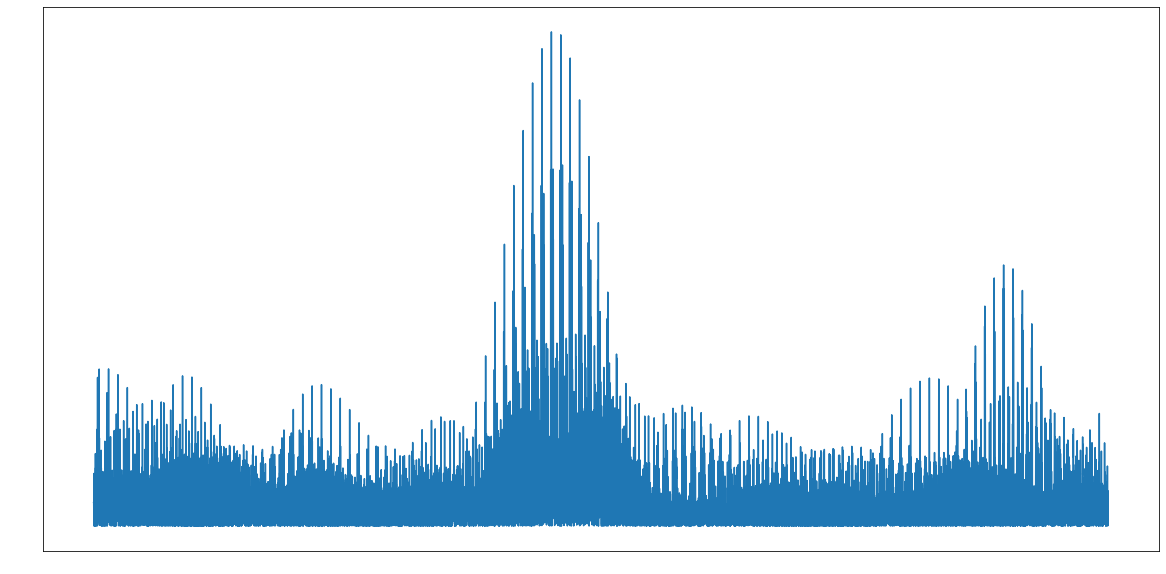

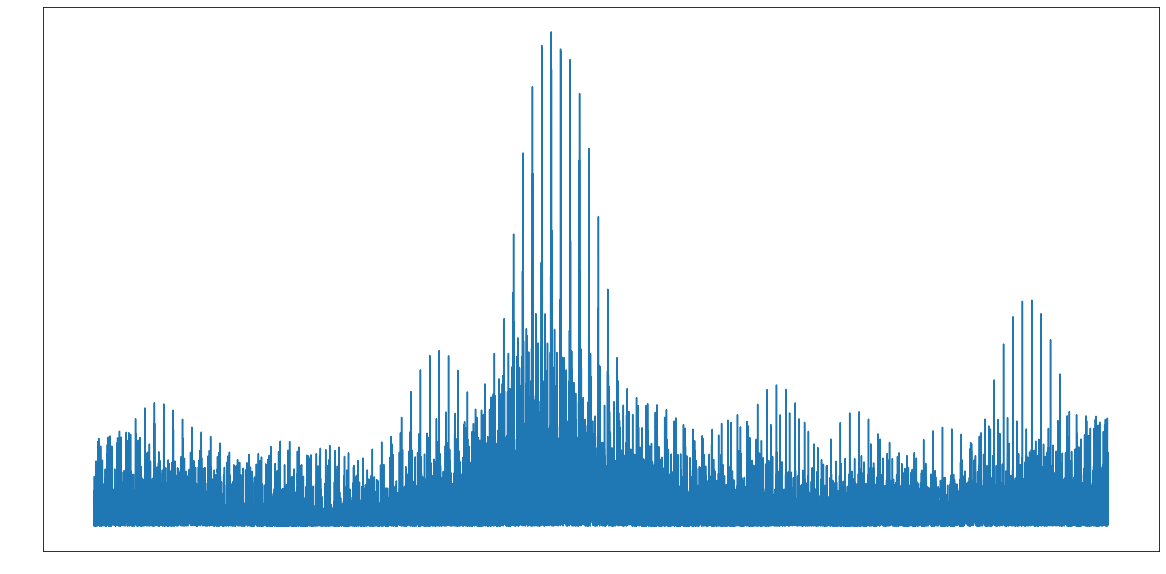

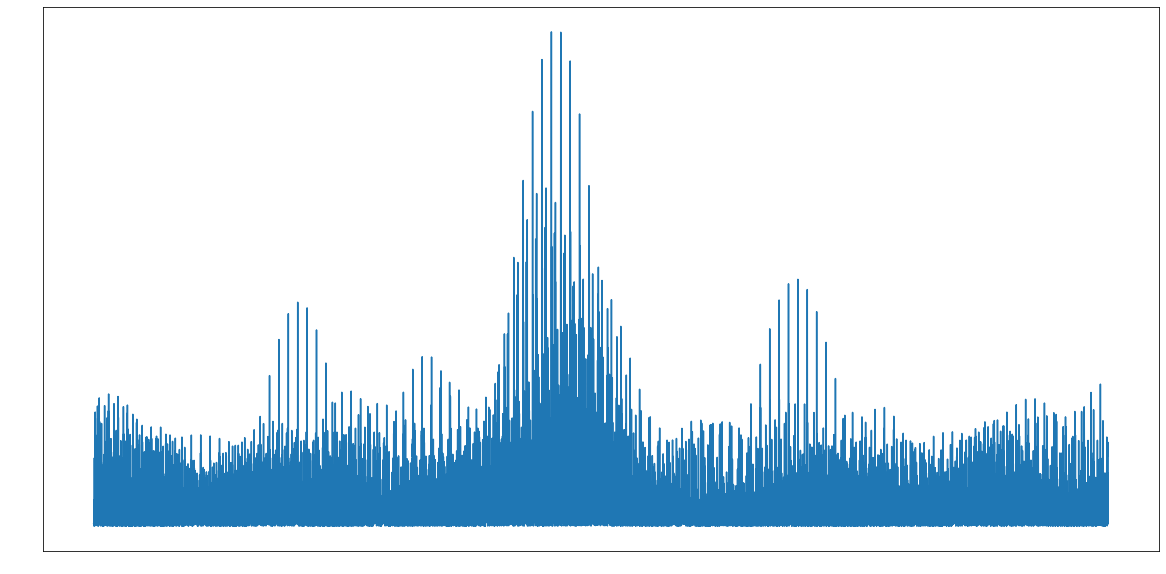

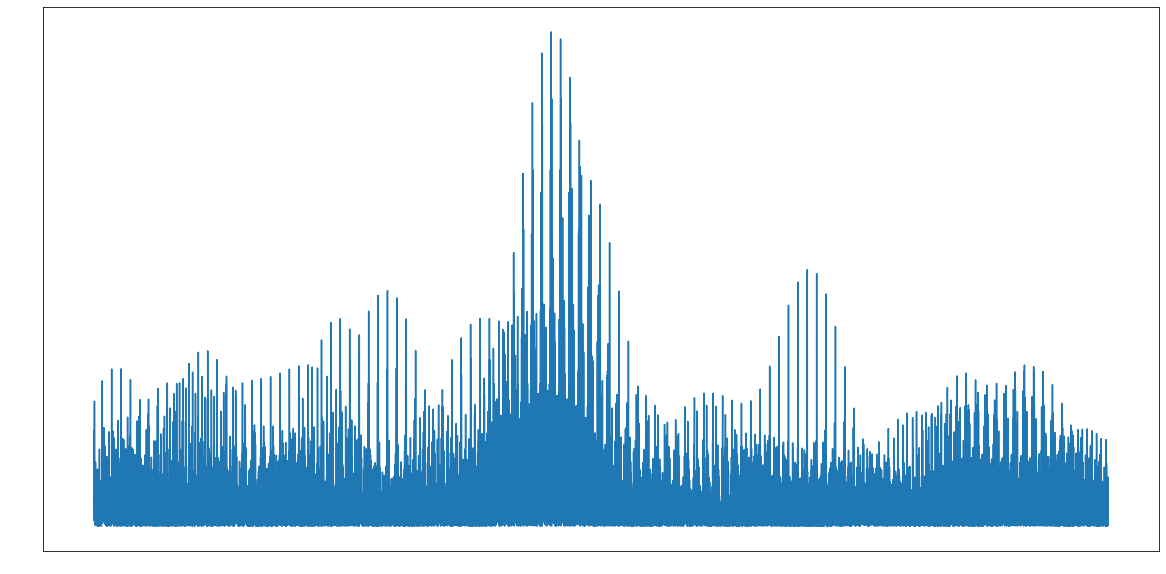

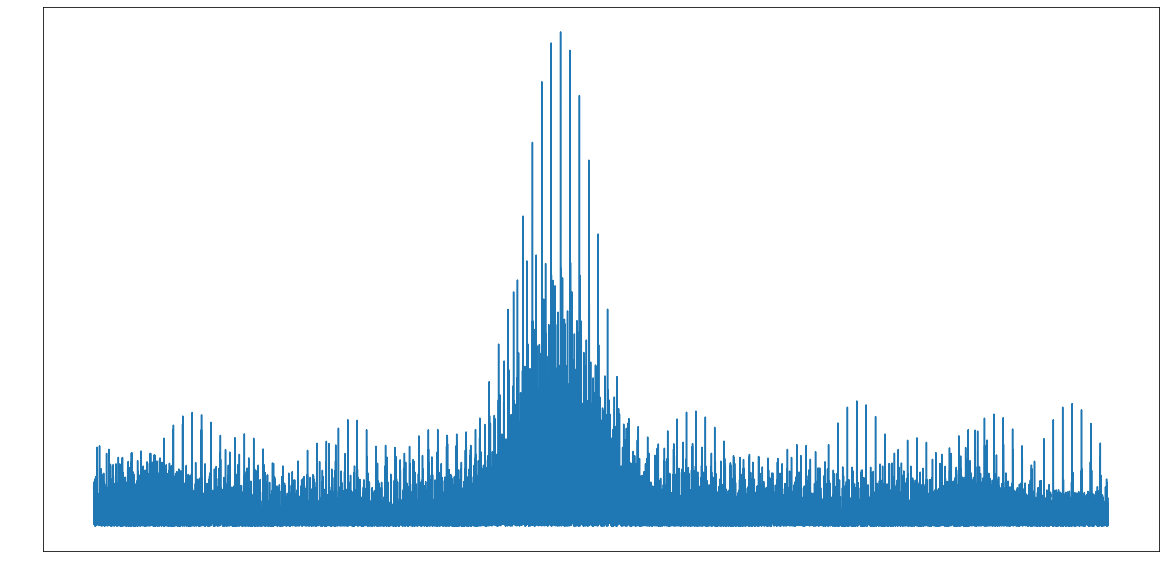

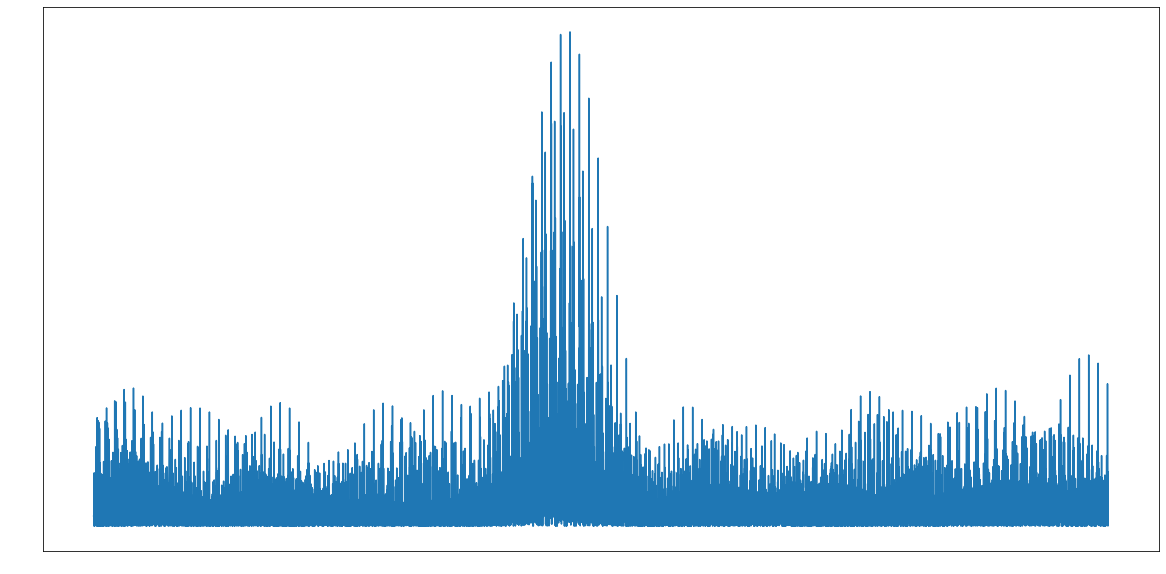

In [24]:
#orbital period
phases = foldMeth(time, 9.97/24)
time0=[]
flux0=[]
time1=[]
flux1=[]
time2=[]
flux2=[]
time3=[]
flux3=[]
time4=[]
flux4=[]
time5=[]
flux5=[]
time6=[]
flux6=[]
time7=[]
flux7=[]
time8=[]
flux8=[]
time9=[]
flux9=[]
for count, value in enumerate(phases):
    if 0<=value<0.1:
        time0.append(time[count])
        flux0.append(flux[count])
    if 0.1<=value<0.2:
        time1.append(time[count])
        flux1.append(flux[count])
    if 0.2<=value<0.3:
        time2.append(time[count])
        flux2.append(flux[count])
    if 0.3<=value<0.4:
        time3.append(time[count])
        flux3.append(flux[count])
    if 0.4<=value<0.5:
        time4.append(time[count])
        flux4.append(flux[count])
    if 0.5<=value<0.6:
        time5.append(time[count])
        flux5.append(flux[count])
    if 0.6<=value<0.7:
        time6.append(time[count])
        flux6.append(flux[count])
    if 0.7<=value<0.8:
        time7.append(time[count])
        flux7.append(flux[count])
    if 0.8<=value<0.9:
        time8.append(time[count])
        flux8.append(flux[count])
    if 0.9<=value<1:
        time9.append(time[count])
        flux9.append(flux[count])
        
freq = np.linspace(0.001, 260, 100000)
power = LombScargle(time0, flux0).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power)
plt.show()

power = LombScargle(time1, flux1).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power)
plt.show()

power = LombScargle(time2, flux2).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power)
plt.show()

power = LombScargle(time3, flux3).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power)
plt.show()

power = LombScargle(time4, flux4).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power)
plt.show()

power = LombScargle(time5, flux5).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power)
plt.show()

power = LombScargle(time6, flux6).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power)
plt.show()

power = LombScargle(time7, flux7).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power)
plt.show()

power = LombScargle(time8, flux8).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power)
plt.show()

power = LombScargle(time9, flux9).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power)
plt.show()

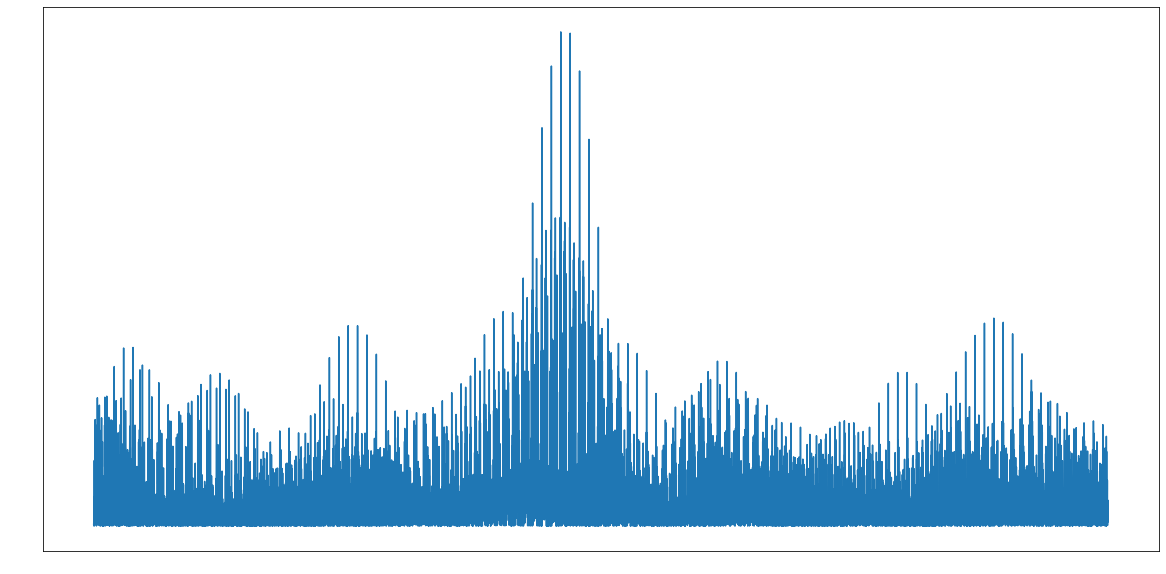

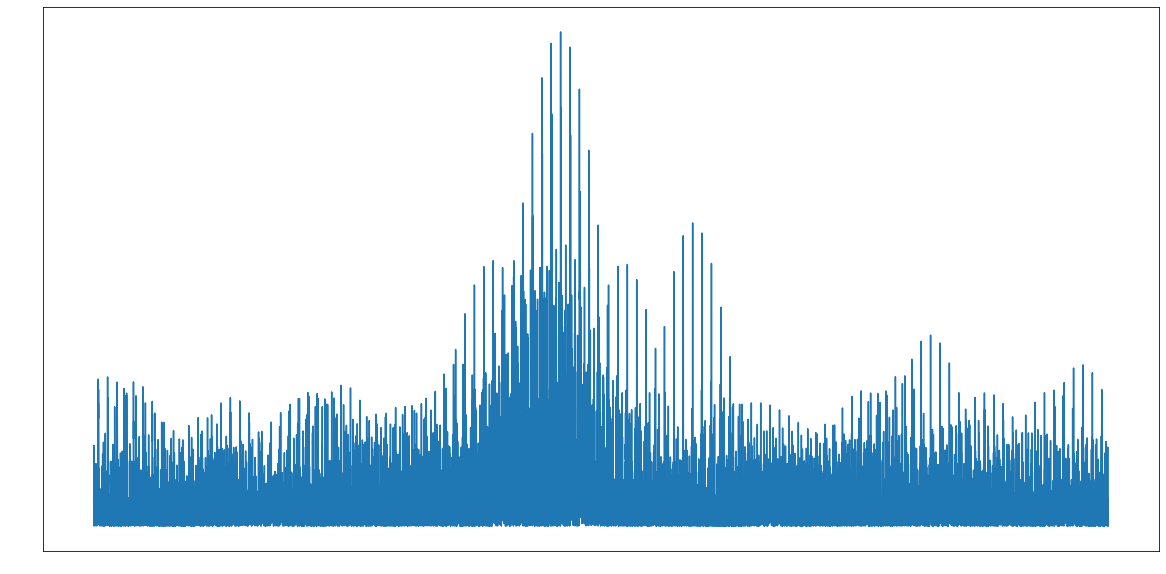

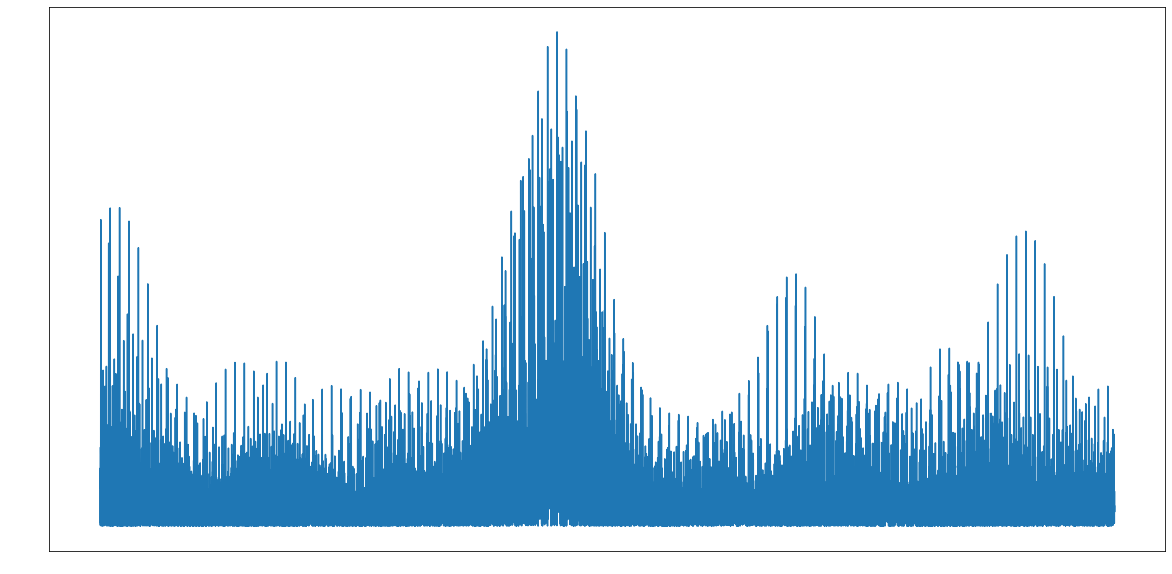

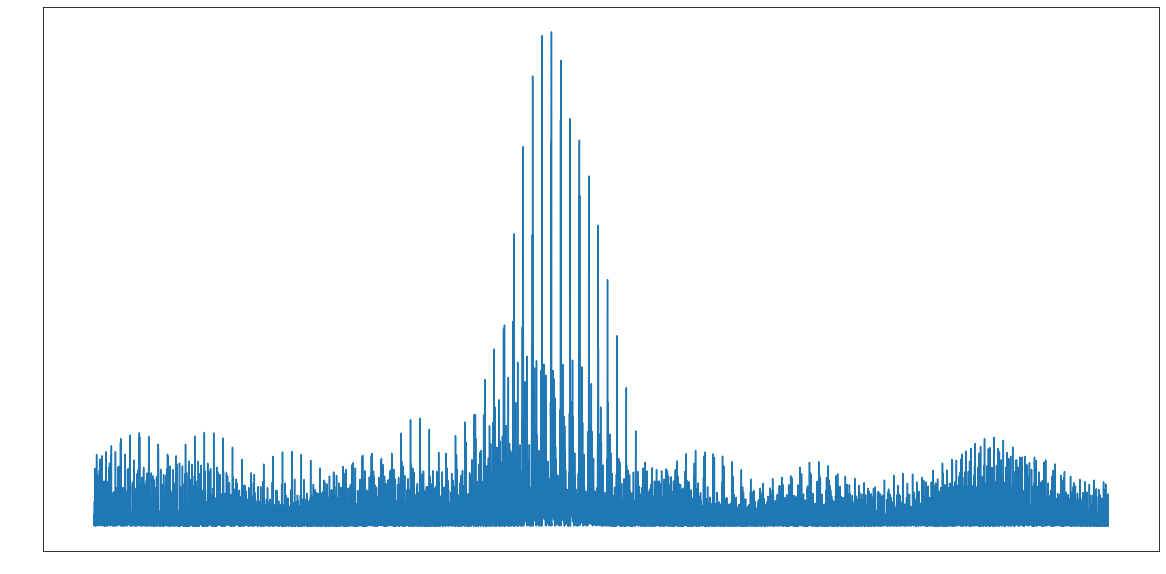

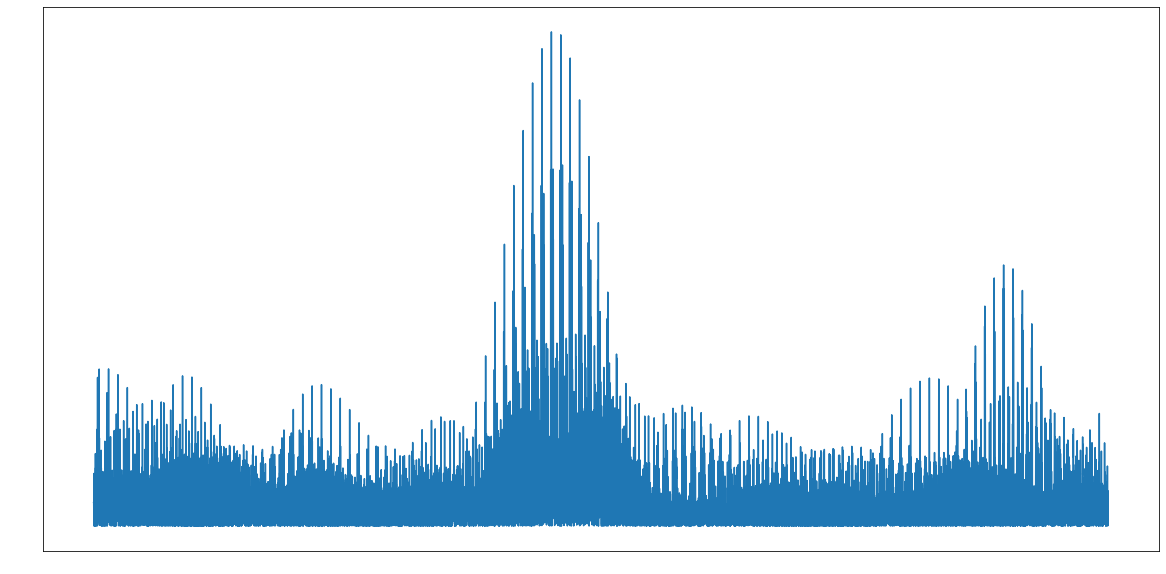

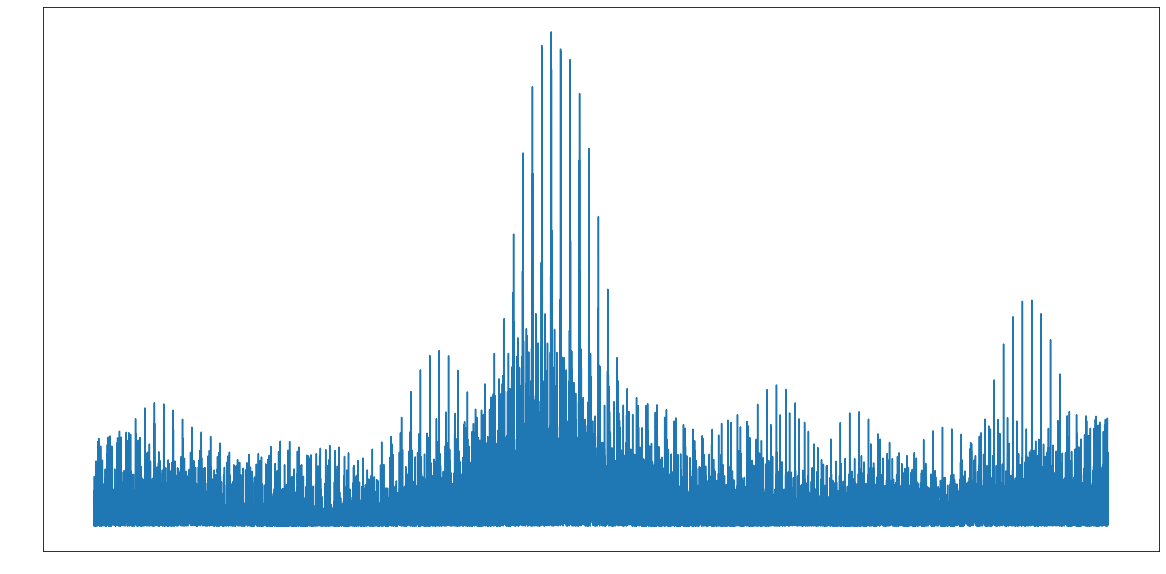

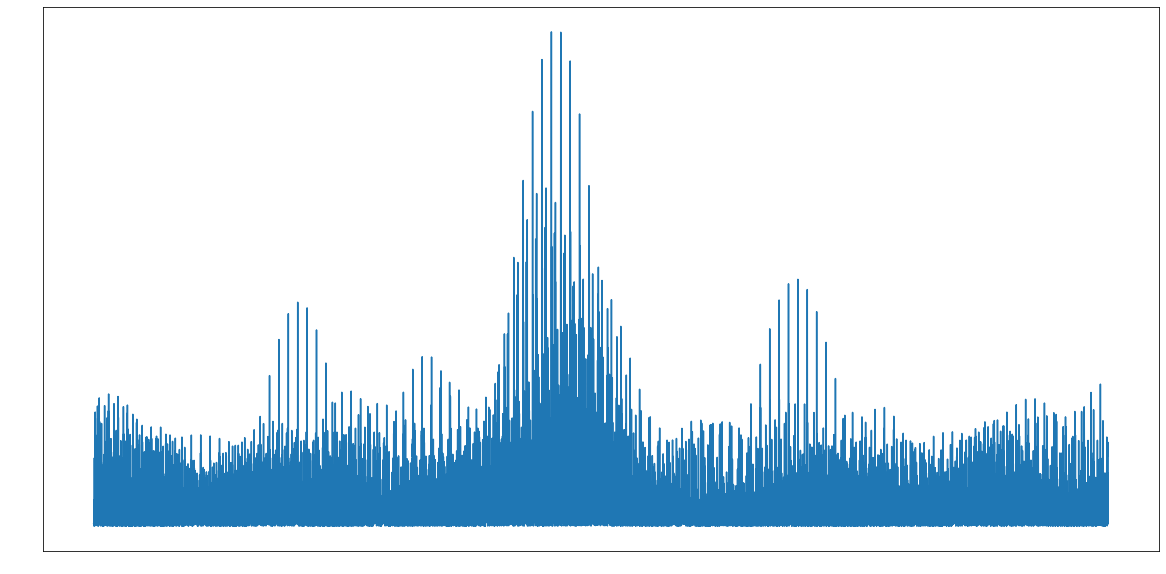

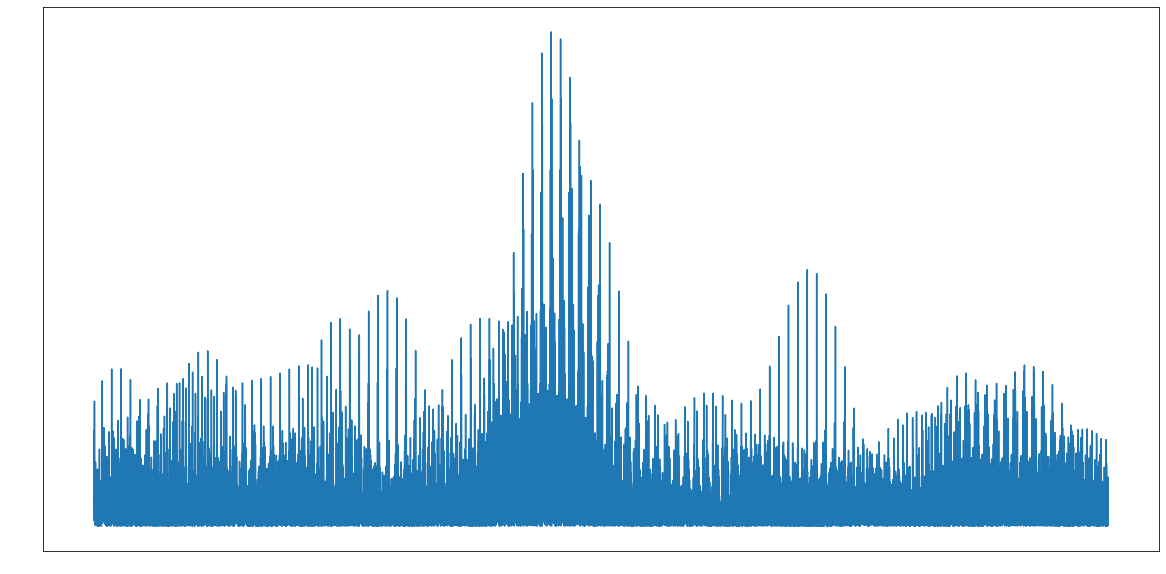

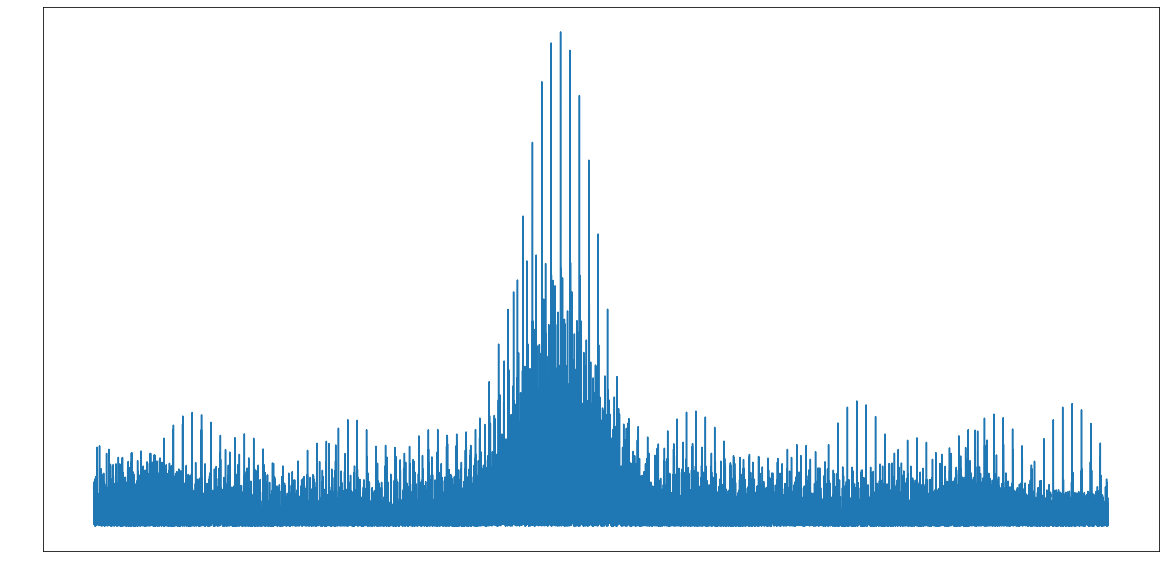

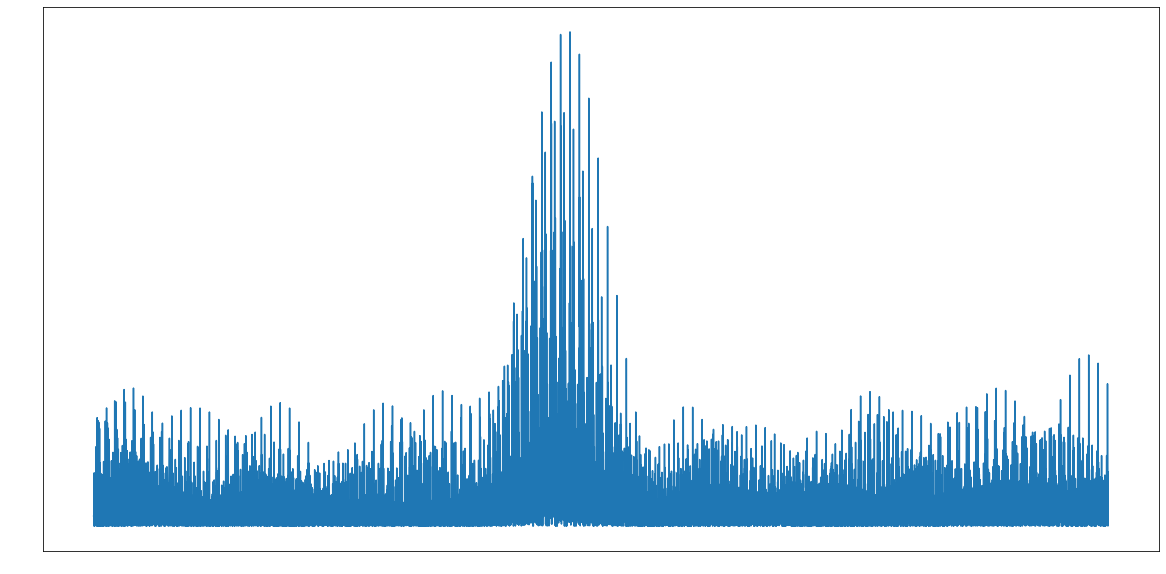

In [46]:
#orbital period
phases = foldMeth(time, 9.97/24)
time0=[]
flux0=[]
time1=[]
flux1=[]
time2=[]
flux2=[]
time3=[]
flux3=[]
time4=[]
flux4=[]
time5=[]
flux5=[]
time6=[]
flux6=[]
time7=[]
flux7=[]
time8=[]
flux8=[]
time9=[]
flux9=[]
for count, value in enumerate(phases):
    if 0<=value<0.1:
        time0.append(time[count])
        flux0.append(flux[count])
    if 0.1<=value<0.2:
        time1.append(time[count])
        flux1.append(flux[count])
    if 0.2<=value<0.3:
        time2.append(time[count])
        flux2.append(flux[count])
    if 0.3<=value<0.4:
        time3.append(time[count])
        flux3.append(flux[count])
    if 0.4<=value<0.5:
        time4.append(time[count])
        flux4.append(flux[count])
    if 0.5<=value<0.6:
        time5.append(time[count])
        flux5.append(flux[count])
    if 0.6<=value<0.7:
        time6.append(time[count])
        flux6.append(flux[count])
    if 0.7<=value<0.8:
        time7.append(time[count])
        flux7.append(flux[count])
    if 0.8<=value<0.9:
        time8.append(time[count])
        flux8.append(flux[count])
    if 0.9<=value<1:
        time9.append(time[count])
        flux9.append(flux[count])
        
freq = np.linspace(0.001, 260, 100000)
power0 = LombScargle(time0, flux0).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power0)
plt.show()

power1 = LombScargle(time1, flux1).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power1)
plt.show()

power2 = LombScargle(time2, flux2).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power2)
plt.show()

power3 = LombScargle(time3, flux3).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power3)
plt.show()

power4 = LombScargle(time4, flux4).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power4)
plt.show()

power5 = LombScargle(time5, flux5).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power5)
plt.show()

power6 = LombScargle(time6, flux6).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power6)
plt.show()

power7 = LombScargle(time7, flux7).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power7)
plt.show()

power8 = LombScargle(time8, flux8).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power8)
plt.show()

power9 = LombScargle(time9, flux9).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power9)
plt.show()

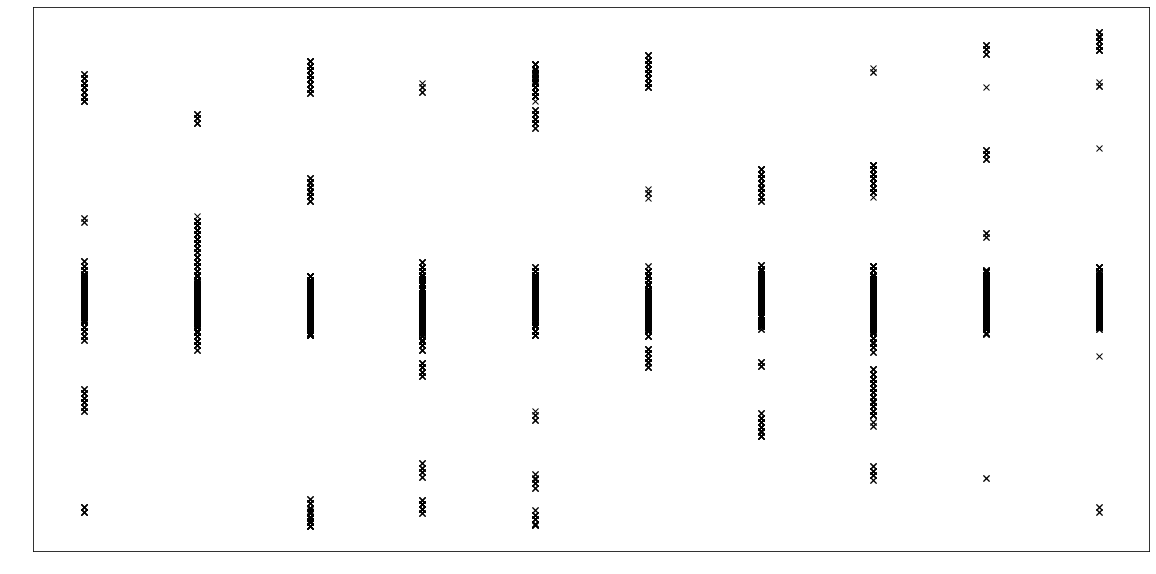

In [47]:
larFre0 = []
thresh=0.0015
for count, value in enumerate(power0):
    if value>thresh:
        larFre0.append(freq[count])
        

larFre1 = []
thresh=0.0015
for count, value in enumerate(power1):
    if value>thresh:
        larFre1.append(freq[count])
        

larFre2 = []
thresh=0.0015
for count, value in enumerate(power2):
    if value>thresh:
        larFre2.append(freq[count])
        
larFre3 = []
thresh=0.0015
for count, value in enumerate(power3):
    if value>thresh:
        larFre3.append(freq[count])
        
        
larFre4 = []
thresh=0.0015
for count, value in enumerate(power4):
    if value>thresh:
        larFre4.append(freq[count])

larFre5 = []
thresh=0.0015
for count, value in enumerate(power5):
    if value>thresh:
        larFre5.append(freq[count])
        
larFre6 = []
thresh=0.0015
for count, value in enumerate(power6):
    if value>thresh:
        larFre6.append(freq[count])
        
larFre7 = []
thresh=0.0015
for count, value in enumerate(power7):
    if value>thresh:
        larFre7.append(freq[count])
        
        
larFre8 = []
thresh=0.0015
for count, value in enumerate(power8):
    if value>thresh:
        larFre8.append(freq[count])
        
        
larFre9 = []
thresh=0.0015
for count, value in enumerate(power9):
    if value>thresh:
        larFre9.append(freq[count])
        
        
plt.figure(figsize=(20,10))
plt.plot(0.05*np.ones_like(larFre0), larFre0, 'kx')
plt.plot(0.15*np.ones_like(larFre1), larFre1, 'kx')
plt.plot(0.25*np.ones_like(larFre2), larFre2, 'kx')
plt.plot(0.35*np.ones_like(larFre3), larFre3, 'kx')
plt.plot(0.45*np.ones_like(larFre4), larFre4, 'kx')
plt.plot(0.55*np.ones_like(larFre5), larFre5, 'kx')
plt.plot(0.65*np.ones_like(larFre6), larFre6, 'kx')
plt.plot(0.75*np.ones_like(larFre7), larFre7, 'kx')
plt.plot(0.85*np.ones_like(larFre8), larFre8, 'kx')
plt.plot(0.95*np.ones_like(larFre9), larFre9, 'kx')

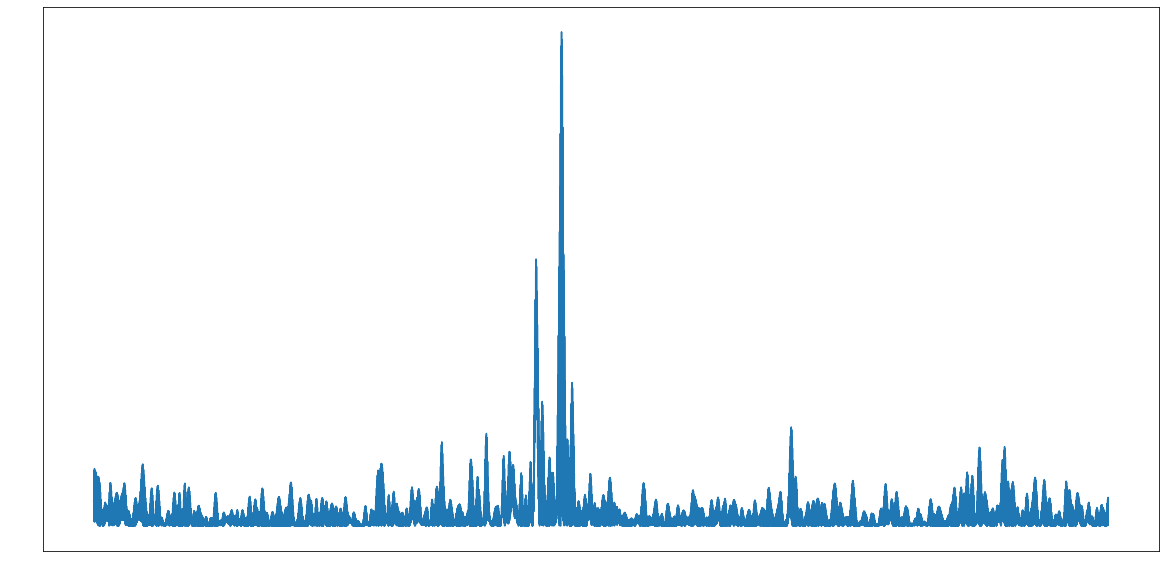

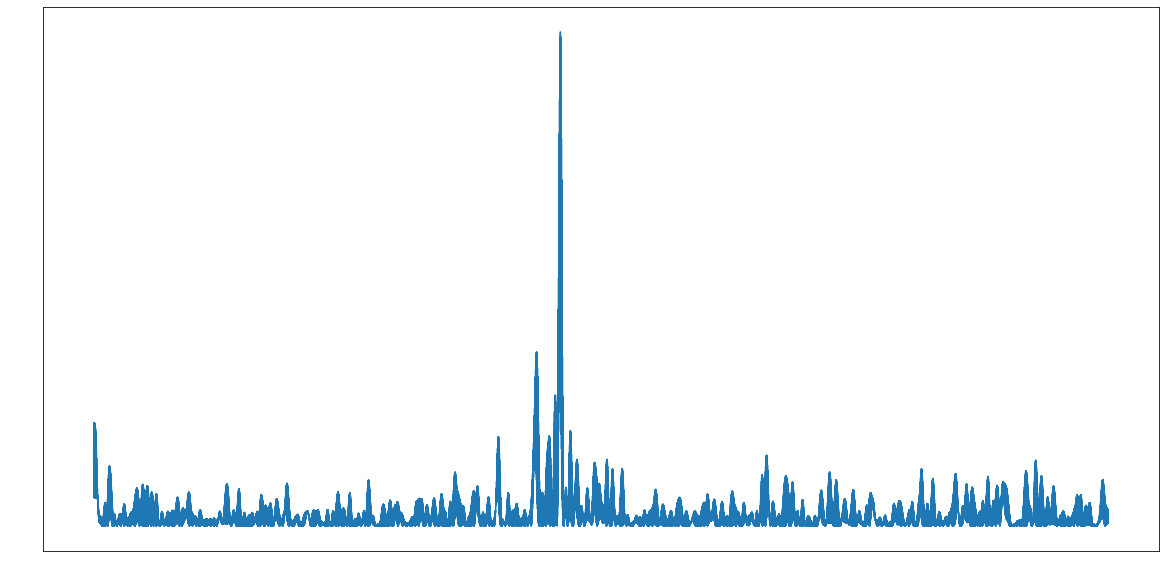

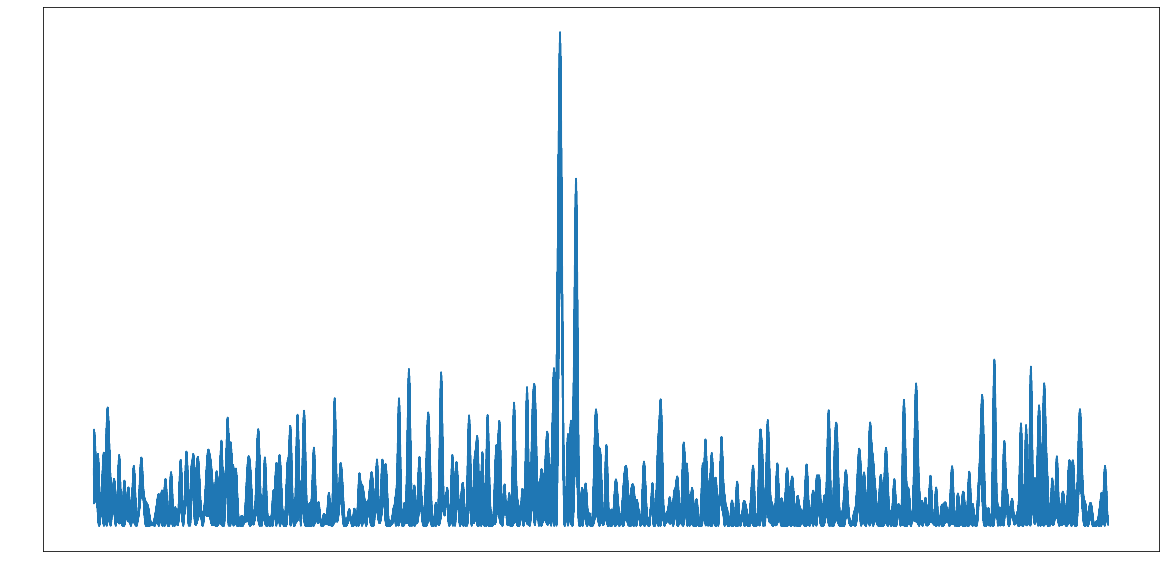

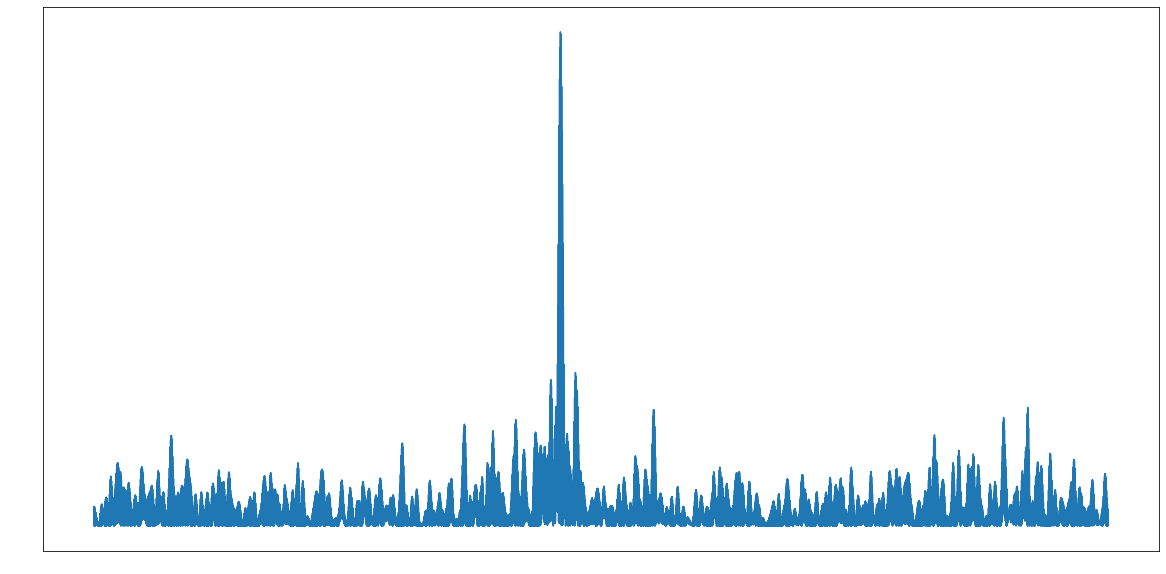

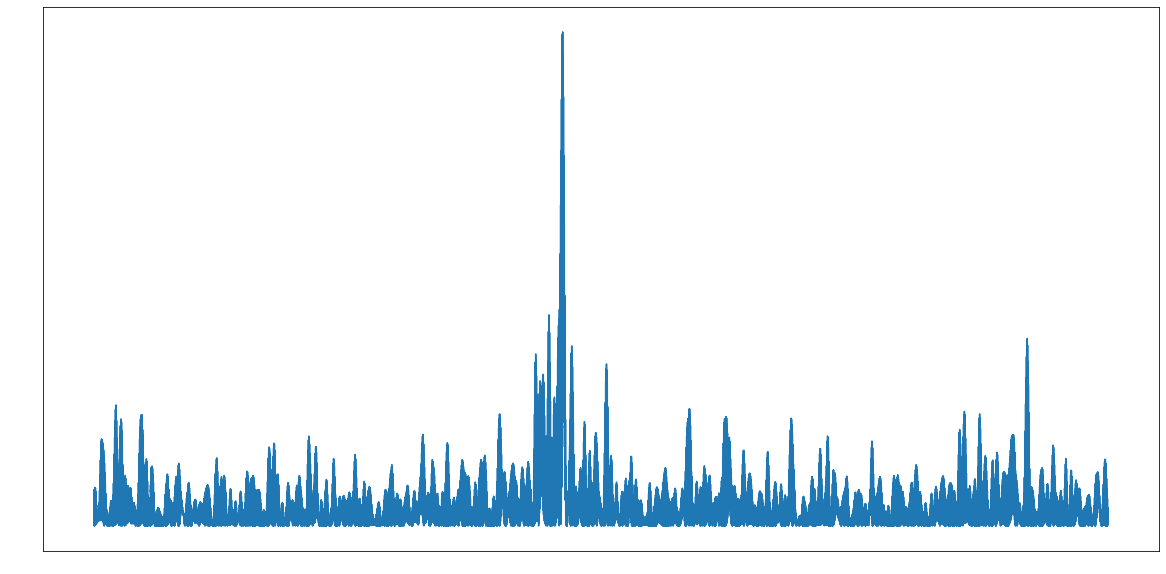

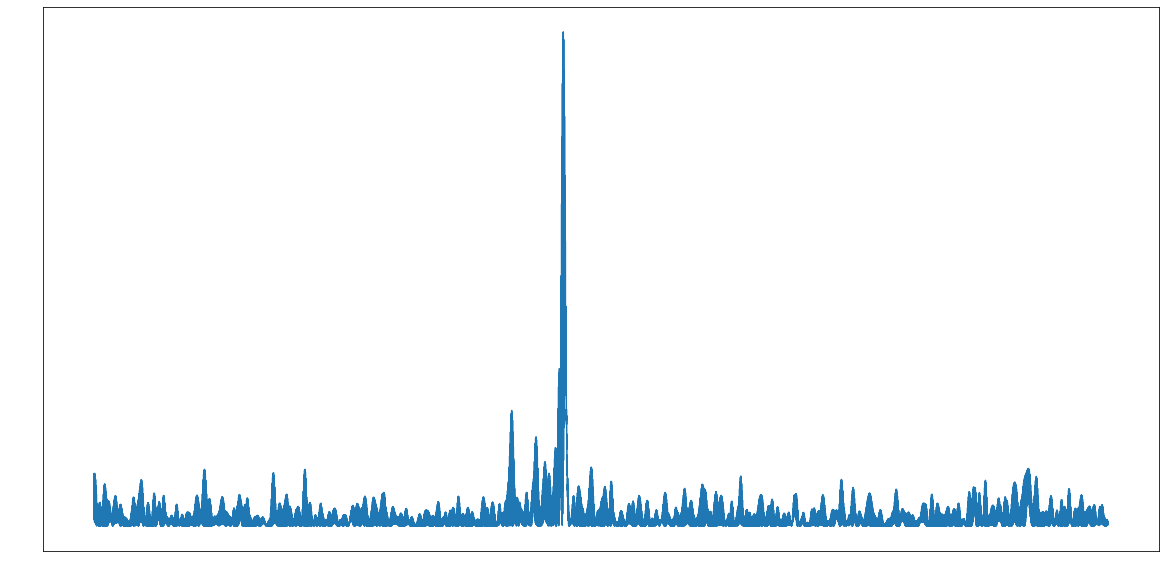

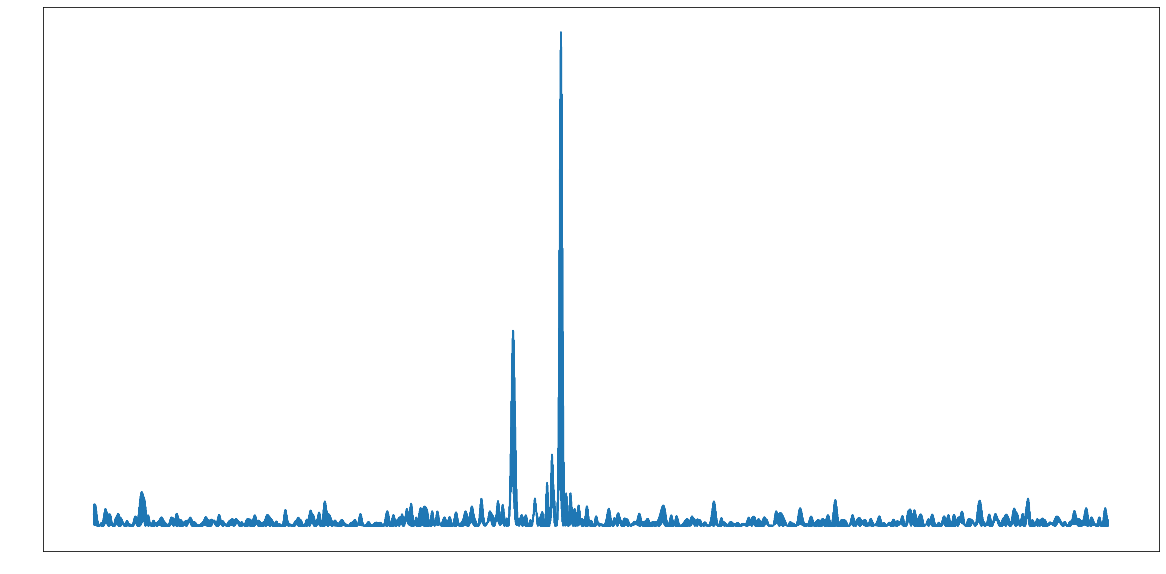

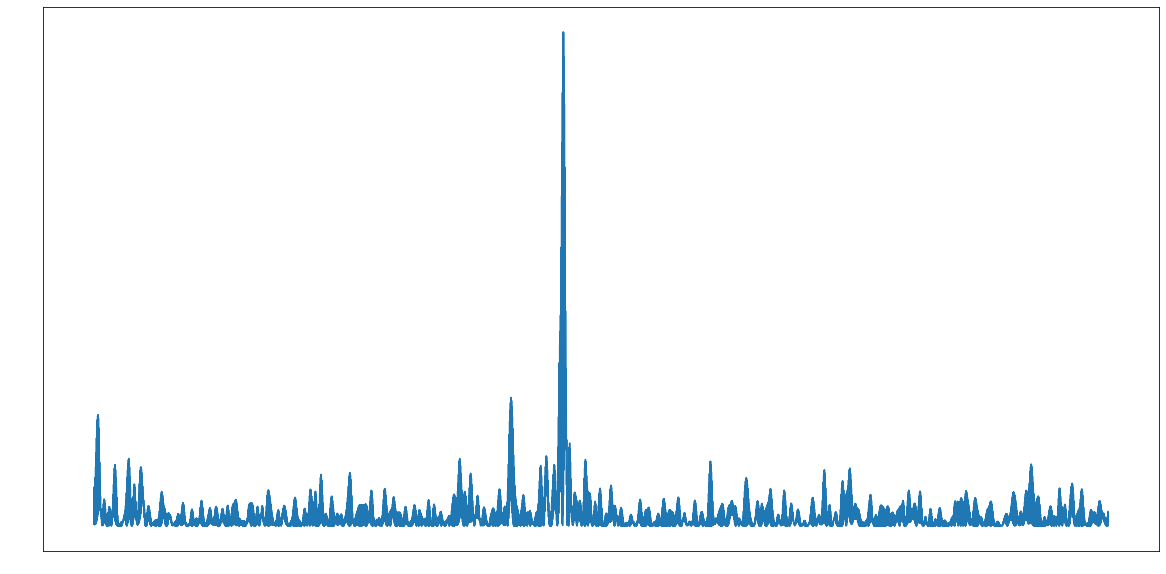

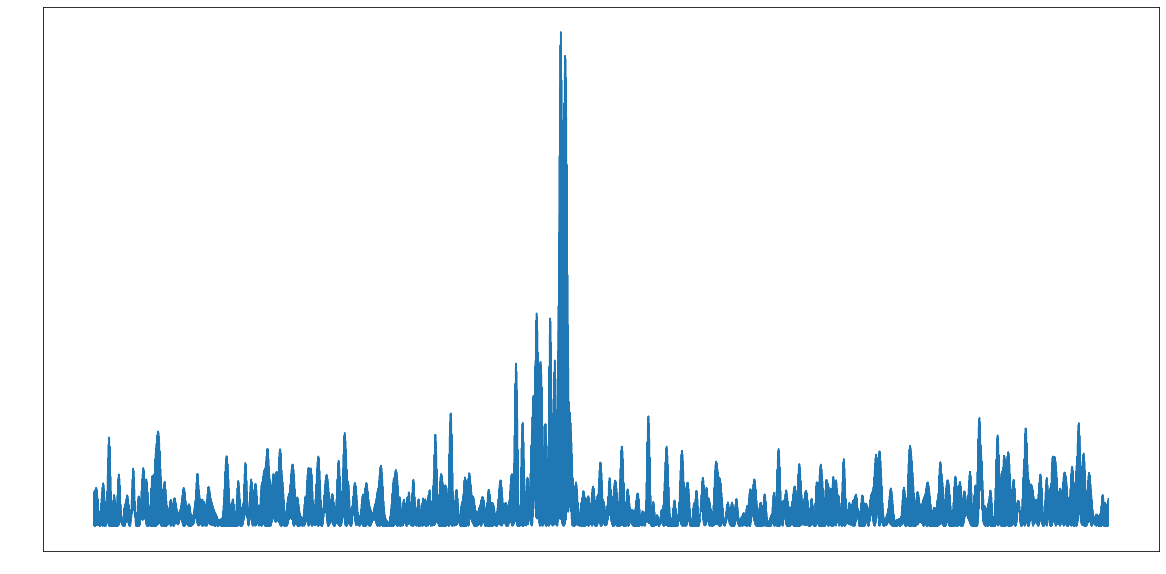

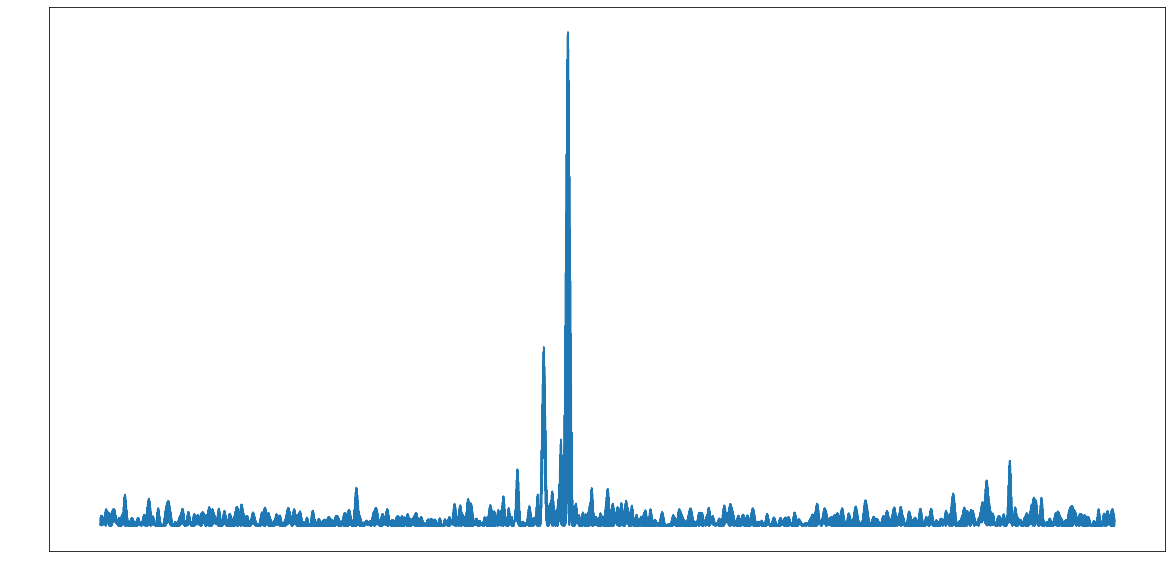

In [40]:
#orbital period
phases = foldMeth(time, 9.6)
time0=[]
flux0=[]
time1=[]
flux1=[]
time2=[]
flux2=[]
time3=[]
flux3=[]
time4=[]
flux4=[]
time5=[]
flux5=[]
time6=[]
flux6=[]
time7=[]
flux7=[]
time8=[]
flux8=[]
time9=[]
flux9=[]
for count, value in enumerate(phases):
    if 0<=value<0.1:
        time0.append(time[count])
        flux0.append(flux[count])
    if 0.1<=value<0.2:
        time1.append(time[count])
        flux1.append(flux[count])
    if 0.2<=value<0.3:
        time2.append(time[count])
        flux2.append(flux[count])
    if 0.3<=value<0.4:
        time3.append(time[count])
        flux3.append(flux[count])
    if 0.4<=value<0.5:
        time4.append(time[count])
        flux4.append(flux[count])
    if 0.5<=value<0.6:
        time5.append(time[count])
        flux5.append(flux[count])
    if 0.6<=value<0.7:
        time6.append(time[count])
        flux6.append(flux[count])
    if 0.7<=value<0.8:
        time7.append(time[count])
        flux7.append(flux[count])
    if 0.8<=value<0.9:
        time8.append(time[count])
        flux8.append(flux[count])
    if 0.9<=value<1:
        time9.append(time[count])
        flux9.append(flux[count])
        
freq = np.linspace(0.001, 260, 100000)
power0 = LombScargle(time0, flux0).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power0)
plt.show()

power1 = LombScargle(time1, flux1).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power1)
plt.show()

power2 = LombScargle(time2, flux2).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power2)
plt.show()

power3 = LombScargle(time3, flux3).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power3)
plt.show()

power4 = LombScargle(time4, flux4).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power4)
plt.show()

power5 = LombScargle(time5, flux5).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power5)
plt.show()

power6 = LombScargle(time6, flux6).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power6)
plt.show()

power7 = LombScargle(time7, flux7).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power7)
plt.show()

power8 = LombScargle(time8, flux8).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power8)
plt.show()

power9 = LombScargle(time9, flux9).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power9)
plt.show()

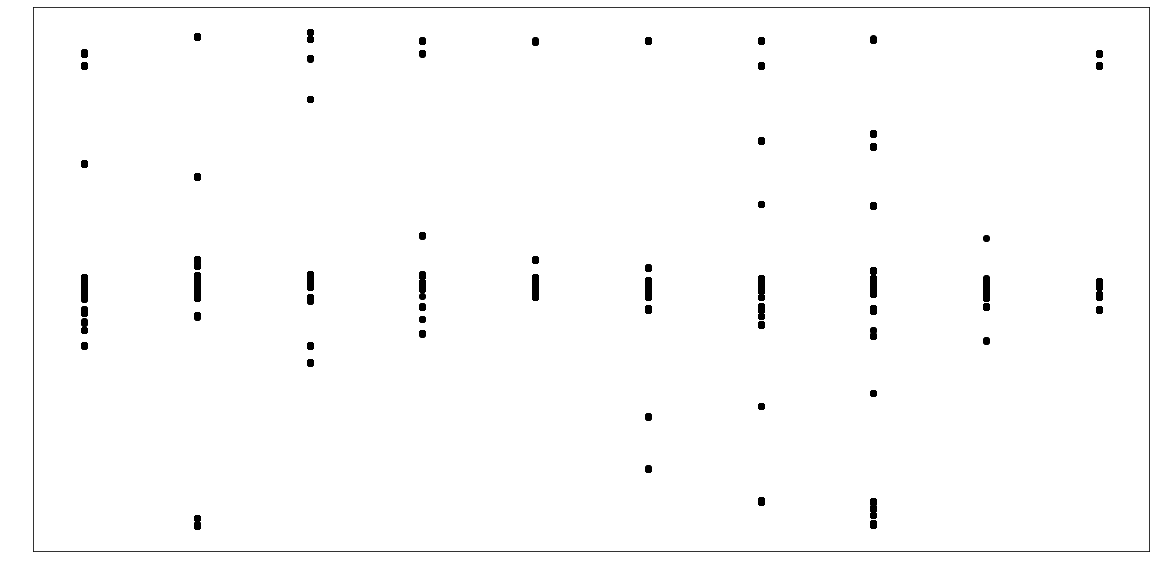

In [43]:
larFre0 = []
thresh=0.0015
for count, value in enumerate(power0):
    if value>thresh:
        larFre0.append(freq[count])
        

larFre1 = []
thresh=0.0015
for count, value in enumerate(power1):
    if value>thresh:
        larFre1.append(freq[count])
        

larFre2 = []
thresh=0.0015
for count, value in enumerate(power2):
    if value>thresh:
        larFre2.append(freq[count])
        
larFre3 = []
thresh=0.0015
for count, value in enumerate(power3):
    if value>thresh:
        larFre3.append(freq[count])
        
        
larFre4 = []
thresh=0.0015
for count, value in enumerate(power4):
    if value>thresh:
        larFre4.append(freq[count])

larFre5 = []
thresh=0.0015
for count, value in enumerate(power5):
    if value>thresh:
        larFre5.append(freq[count])
        
larFre6 = []
thresh=0.0015
for count, value in enumerate(power6):
    if value>thresh:
        larFre6.append(freq[count])
        
larFre7 = []
thresh=0.0015
for count, value in enumerate(power7):
    if value>thresh:
        larFre7.append(freq[count])
        
        
larFre8 = []
thresh=0.0015
for count, value in enumerate(power8):
    if value>thresh:
        larFre8.append(freq[count])
        
        
larFre9 = []
thresh=0.0015
for count, value in enumerate(power9):
    if value>thresh:
        larFre9.append(freq[count])
        
        
plt.figure(figsize=(20,10))
plt.plot(0.05*np.ones_like(larFre0), larFre0, 'ko')
plt.plot(0.15*np.ones_like(larFre1), larFre1, 'ko')
plt.plot(0.25*np.ones_like(larFre2), larFre2, 'ko')
plt.plot(0.35*np.ones_like(larFre3), larFre3, 'ko')
plt.plot(0.45*np.ones_like(larFre4), larFre4, 'ko')
plt.plot(0.55*np.ones_like(larFre5), larFre5, 'ko')
plt.plot(0.65*np.ones_like(larFre6), larFre6, 'ko')
plt.plot(0.75*np.ones_like(larFre7), larFre7, 'ko')
plt.plot(0.85*np.ones_like(larFre8), larFre8, 'ko')
plt.plot(0.95*np.ones_like(larFre9), larFre9, 'ko')

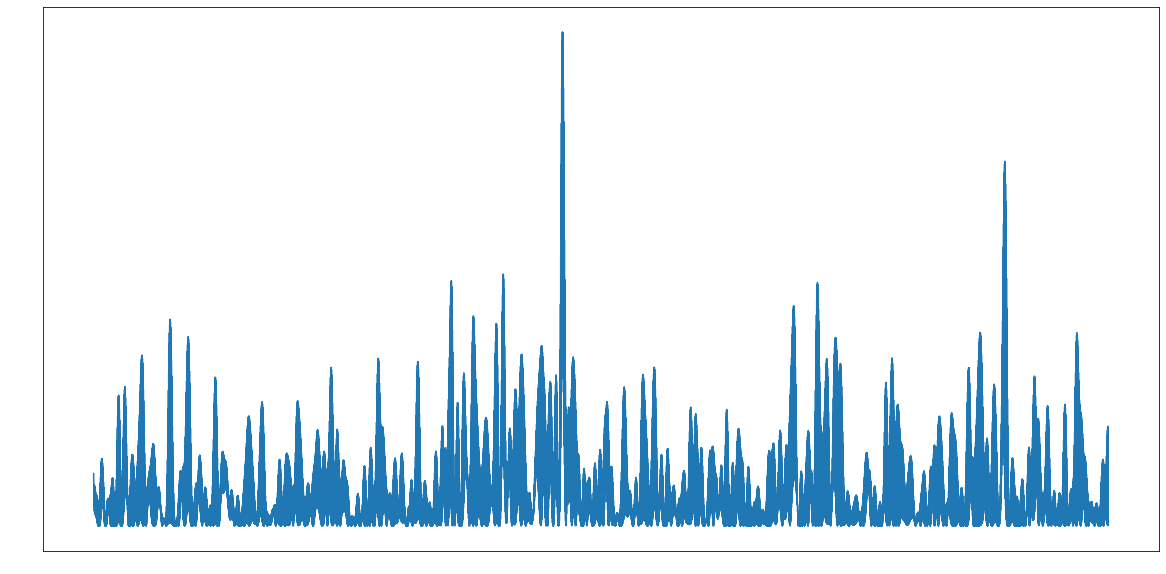

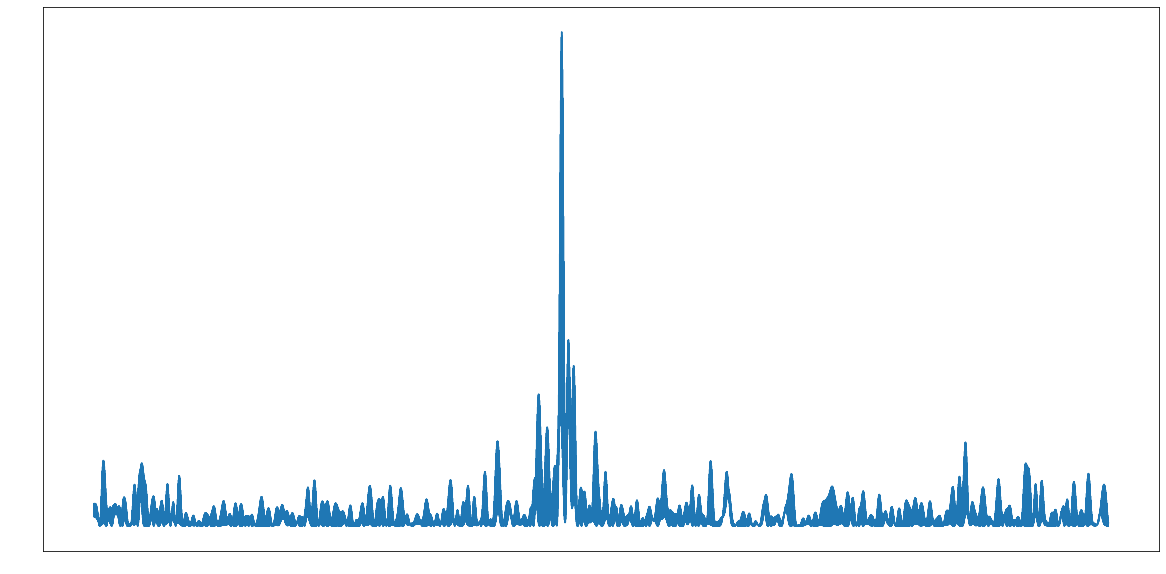

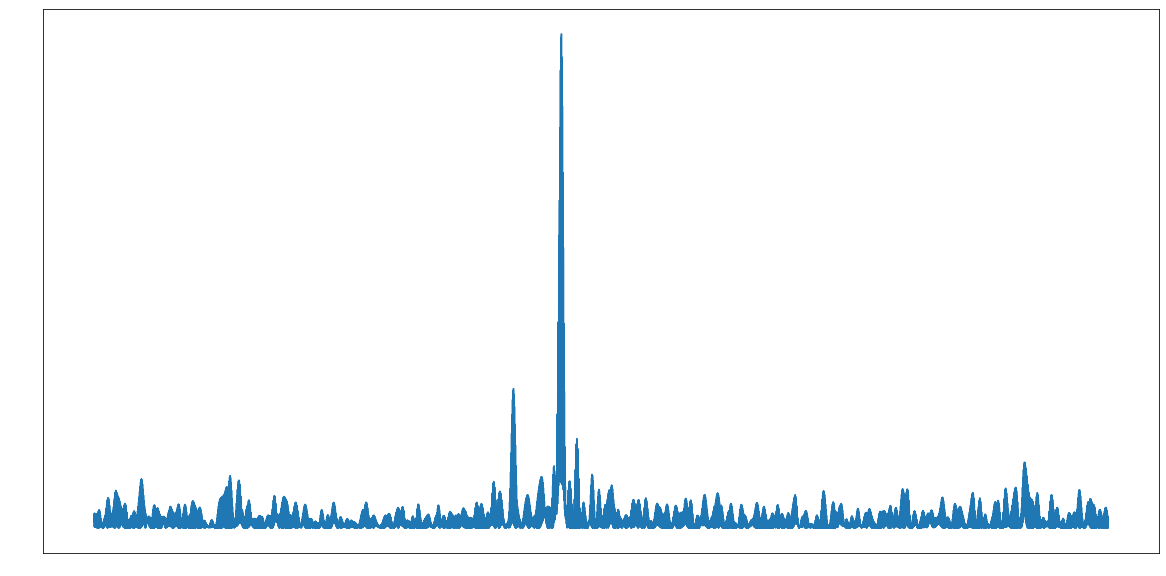

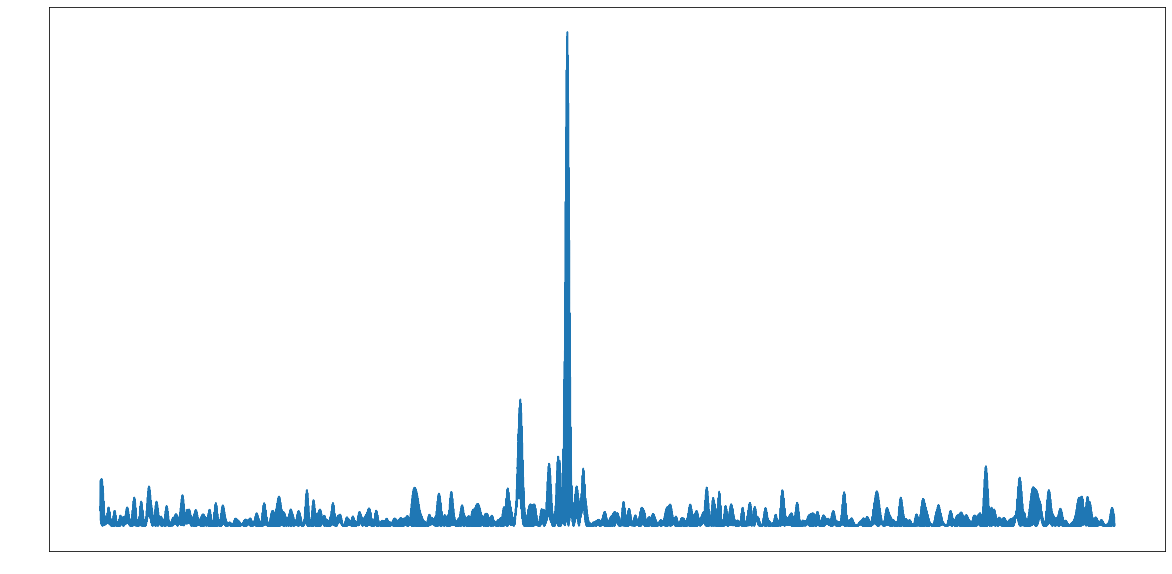

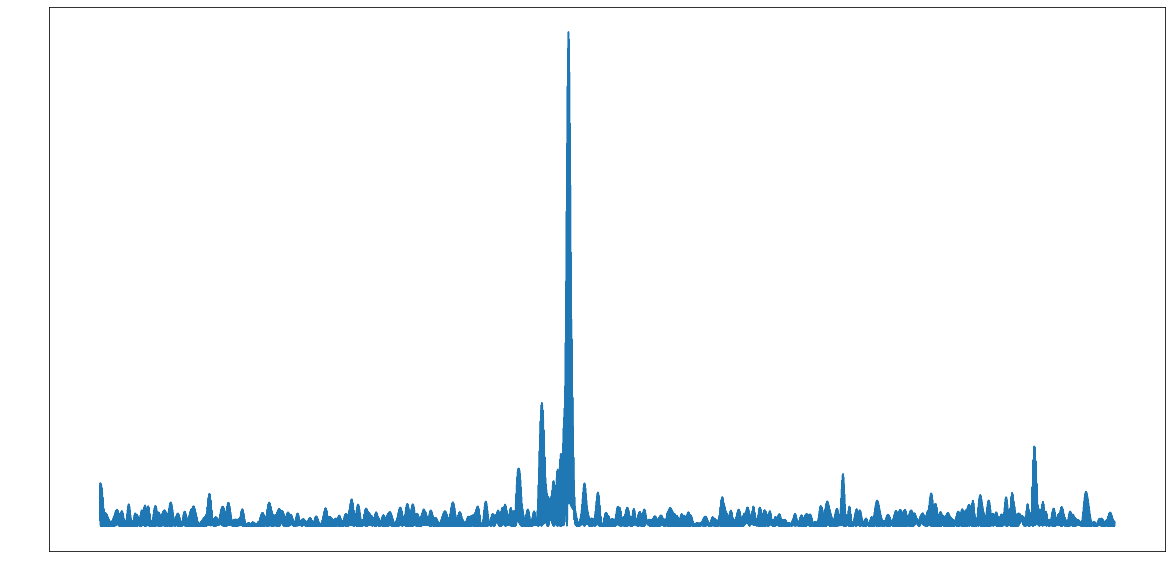

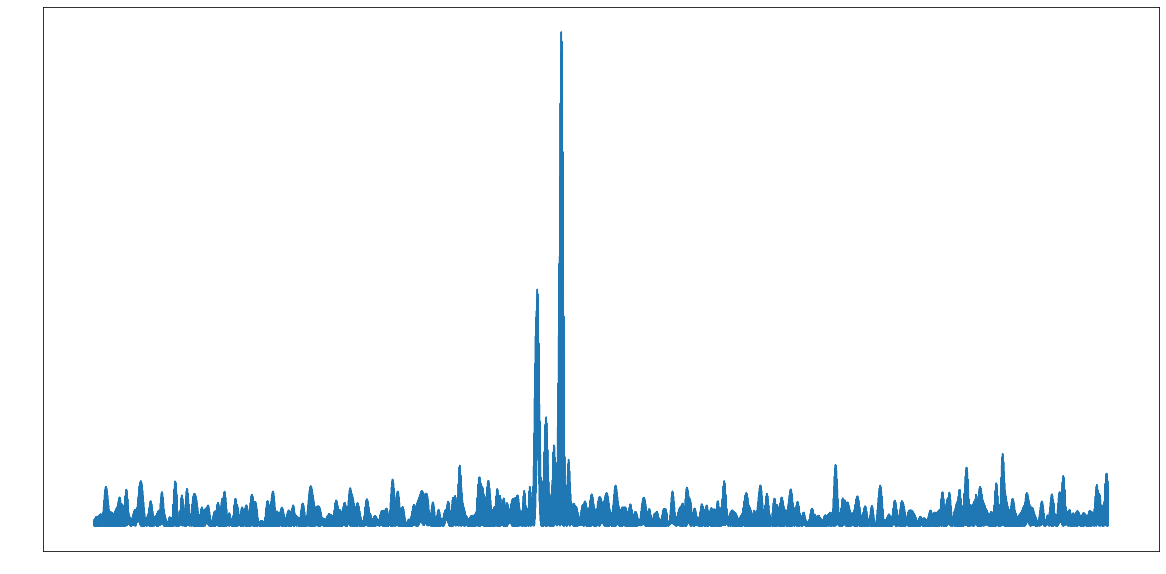

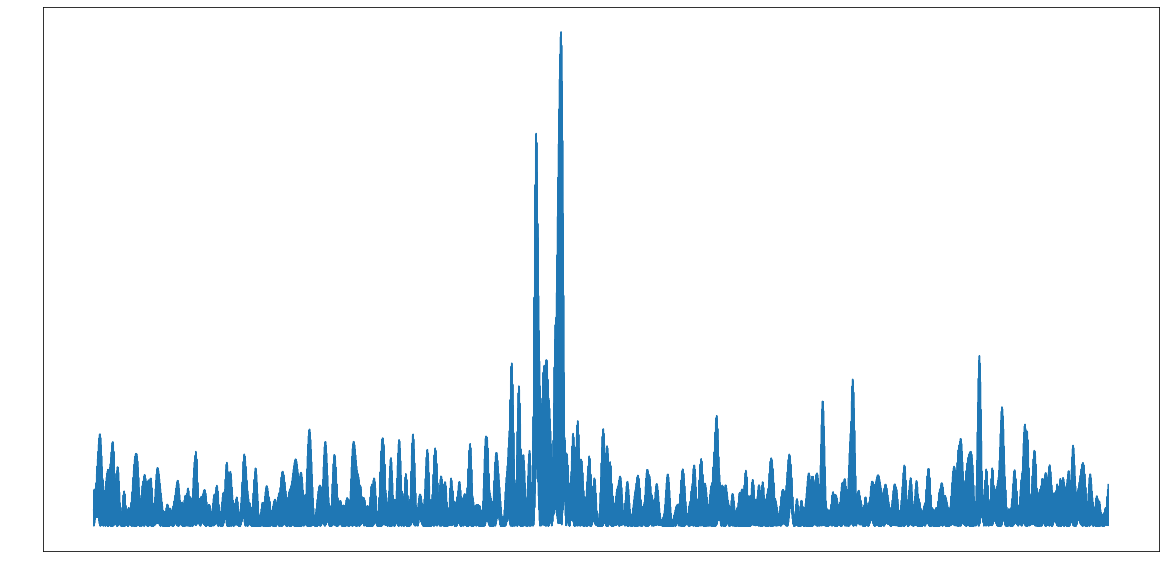

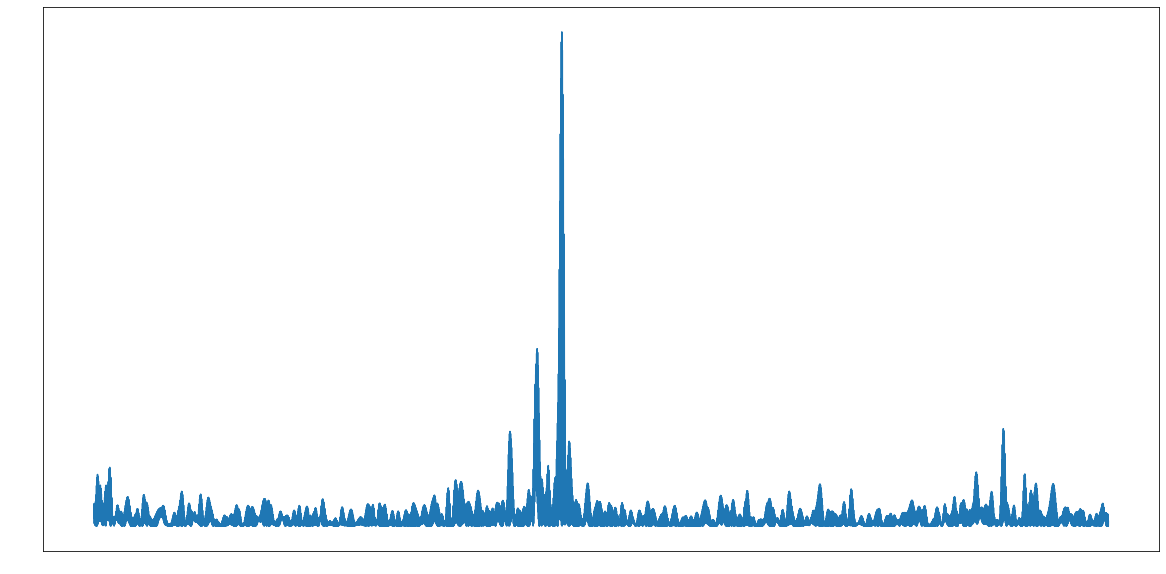

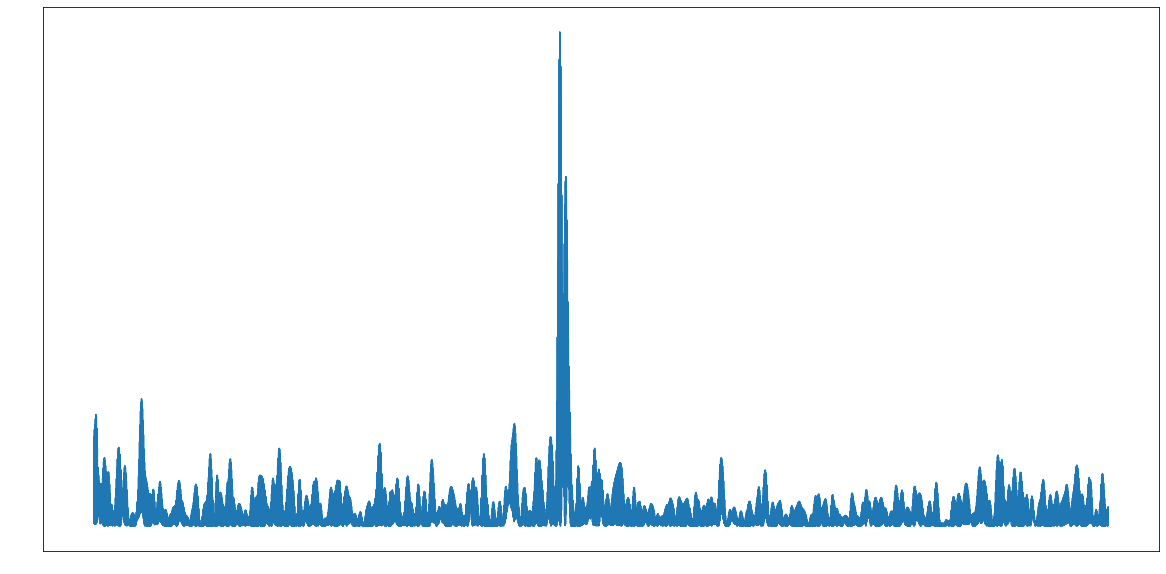

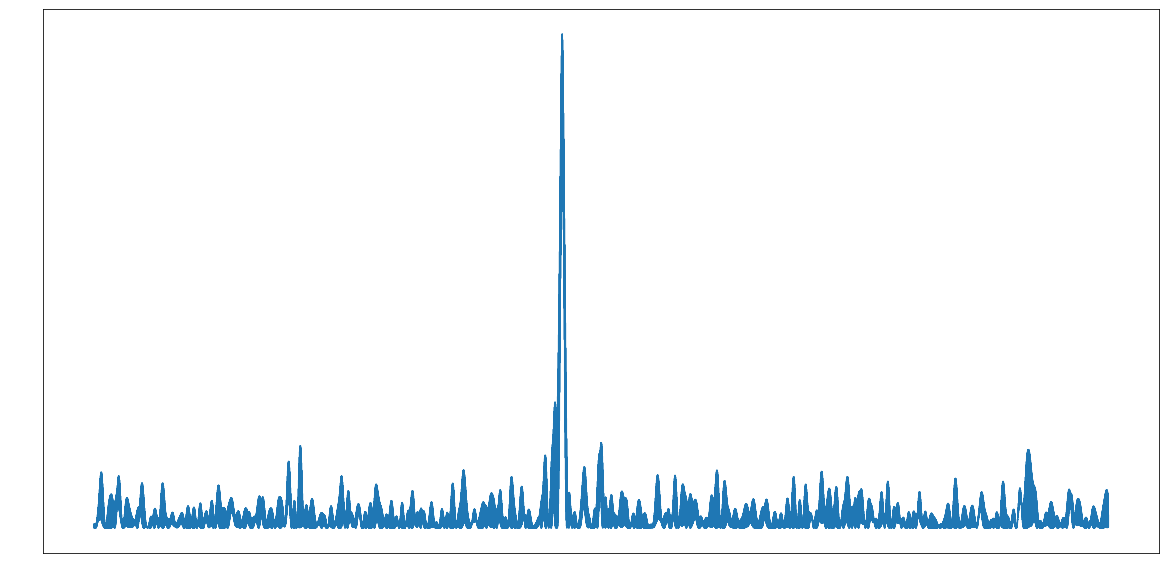

In [44]:
#orbital period
phases = foldMeth(time, 8)
time0=[]
flux0=[]
time1=[]
flux1=[]
time2=[]
flux2=[]
time3=[]
flux3=[]
time4=[]
flux4=[]
time5=[]
flux5=[]
time6=[]
flux6=[]
time7=[]
flux7=[]
time8=[]
flux8=[]
time9=[]
flux9=[]
for count, value in enumerate(phases):
    if 0<=value<0.1:
        time0.append(time[count])
        flux0.append(flux[count])
    if 0.1<=value<0.2:
        time1.append(time[count])
        flux1.append(flux[count])
    if 0.2<=value<0.3:
        time2.append(time[count])
        flux2.append(flux[count])
    if 0.3<=value<0.4:
        time3.append(time[count])
        flux3.append(flux[count])
    if 0.4<=value<0.5:
        time4.append(time[count])
        flux4.append(flux[count])
    if 0.5<=value<0.6:
        time5.append(time[count])
        flux5.append(flux[count])
    if 0.6<=value<0.7:
        time6.append(time[count])
        flux6.append(flux[count])
    if 0.7<=value<0.8:
        time7.append(time[count])
        flux7.append(flux[count])
    if 0.8<=value<0.9:
        time8.append(time[count])
        flux8.append(flux[count])
    if 0.9<=value<1:
        time9.append(time[count])
        flux9.append(flux[count])
        
freq = np.linspace(0.001, 260, 100000)
power0 = LombScargle(time0, flux0).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power0)
plt.show()

power1 = LombScargle(time1, flux1).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power1)
plt.show()

power2 = LombScargle(time2, flux2).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power2)
plt.show()

power3 = LombScargle(time3, flux3).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power3)
plt.show()

power4 = LombScargle(time4, flux4).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power4)
plt.show()

power5 = LombScargle(time5, flux5).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power5)
plt.show()

power6 = LombScargle(time6, flux6).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power6)
plt.show()

power7 = LombScargle(time7, flux7).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power7)
plt.show()

power8 = LombScargle(time8, flux8).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power8)
plt.show()

power9 = LombScargle(time9, flux9).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power9)
plt.show()

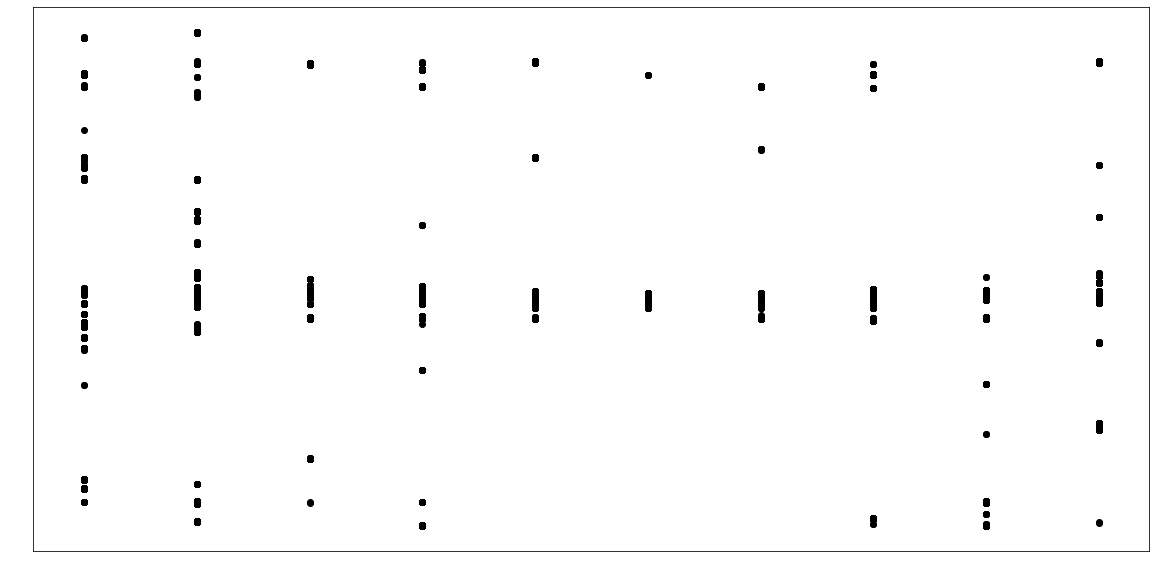

In [45]:
larFre0 = []
thresh=0.0015
for count, value in enumerate(power0):
    if value>thresh:
        larFre0.append(freq[count])
        

larFre1 = []
thresh=0.0015
for count, value in enumerate(power1):
    if value>thresh:
        larFre1.append(freq[count])
        

larFre2 = []
thresh=0.0015
for count, value in enumerate(power2):
    if value>thresh:
        larFre2.append(freq[count])
        
larFre3 = []
thresh=0.0015
for count, value in enumerate(power3):
    if value>thresh:
        larFre3.append(freq[count])
        
        
larFre4 = []
thresh=0.0015
for count, value in enumerate(power4):
    if value>thresh:
        larFre4.append(freq[count])

larFre5 = []
thresh=0.0015
for count, value in enumerate(power5):
    if value>thresh:
        larFre5.append(freq[count])
        
larFre6 = []
thresh=0.0015
for count, value in enumerate(power6):
    if value>thresh:
        larFre6.append(freq[count])
        
larFre7 = []
thresh=0.0015
for count, value in enumerate(power7):
    if value>thresh:
        larFre7.append(freq[count])
        
        
larFre8 = []
thresh=0.0015
for count, value in enumerate(power8):
    if value>thresh:
        larFre8.append(freq[count])
        
        
larFre9 = []
thresh=0.0015
for count, value in enumerate(power9):
    if value>thresh:
        larFre9.append(freq[count])
        
        
plt.figure(figsize=(20,10))
plt.plot(0.05*np.ones_like(larFre0), larFre0, 'ko')
plt.plot(0.15*np.ones_like(larFre1), larFre1, 'ko')
plt.plot(0.25*np.ones_like(larFre2), larFre2, 'ko')
plt.plot(0.35*np.ones_like(larFre3), larFre3, 'ko')
plt.plot(0.45*np.ones_like(larFre4), larFre4, 'ko')
plt.plot(0.55*np.ones_like(larFre5), larFre5, 'ko')
plt.plot(0.65*np.ones_like(larFre6), larFre6, 'ko')
plt.plot(0.75*np.ones_like(larFre7), larFre7, 'ko')
plt.plot(0.85*np.ones_like(larFre8), larFre8, 'ko')
plt.plot(0.95*np.ones_like(larFre9), larFre9, 'ko')

/home/nwal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  


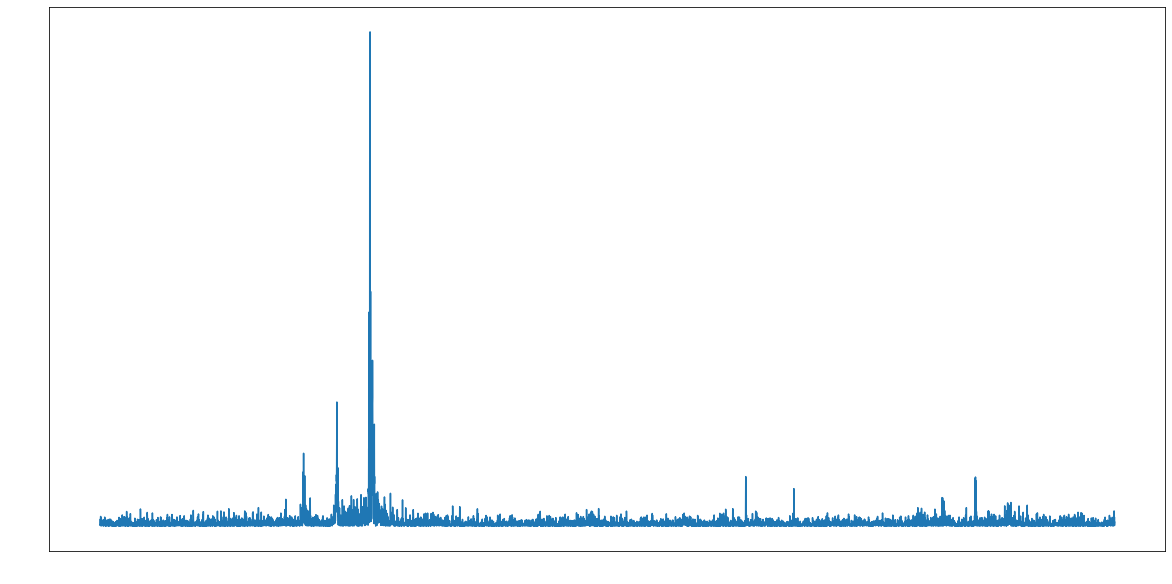

In [67]:
sec30 = search_result[2].download()
sec3 = sec30.PDCSAP_FLUX.remove_nans()
flux = sec3.flux.to_value()
time = sec3.time.mjd
time = time*24*60*60
freq = np.linspace(800e-6, 3000e-6, 10000)
power = LombScargle(time, flux).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq*1e6,power)
#plt.plot([1305.215e-6,1305.215e-6],[0,0.007])
#plt.plot([1306.980e-6,1306.980e-6],[0,0.007])
#plt.plot([1308.724e-6,1308.724e-6],[0,0.007])
plt.xticks(fontsize=20)
#powerTess = power
#plt.xlim(5,7)

dat = np.vstack((freq*1e6, power))
dat = dat.T
np.savetxt('LSGD1400Sec30Global.dat', dat, delimiter = '\t')

In [ ]:
1.547654765

In [7]:
(1/(1.547654765/1e6))/60/60/24/2

3.7392299419160424

In [8]:
3.7392299419160424/(9.97/24)

9.001155326578235

In [9]:
3.74/(9.97/24)

9.003009027081243

/home/nwal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  


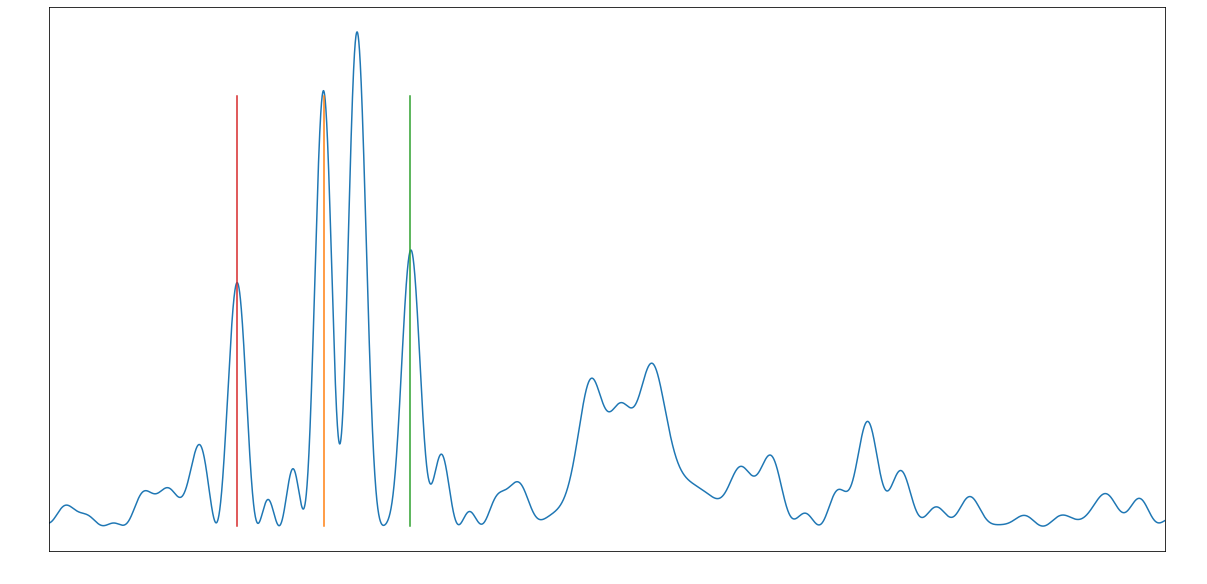

1997.3347334733476


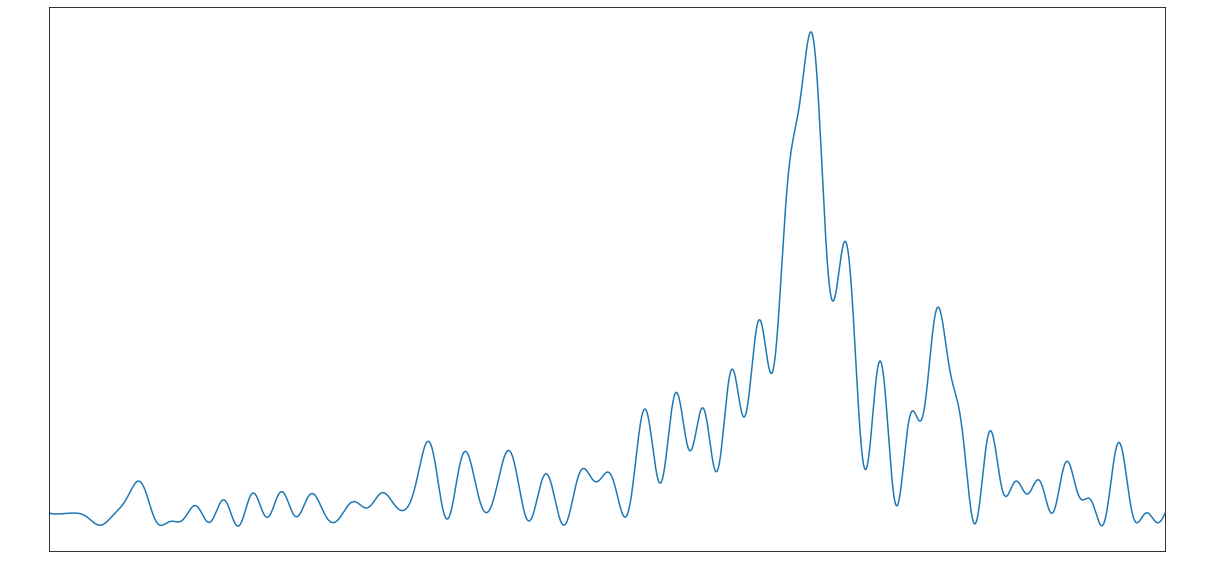

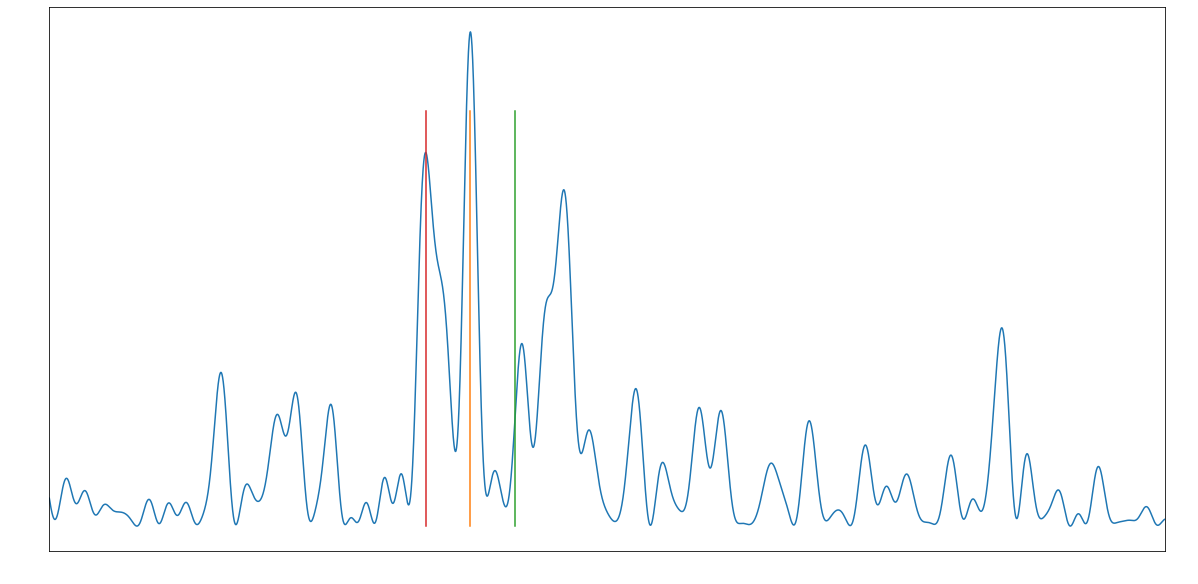

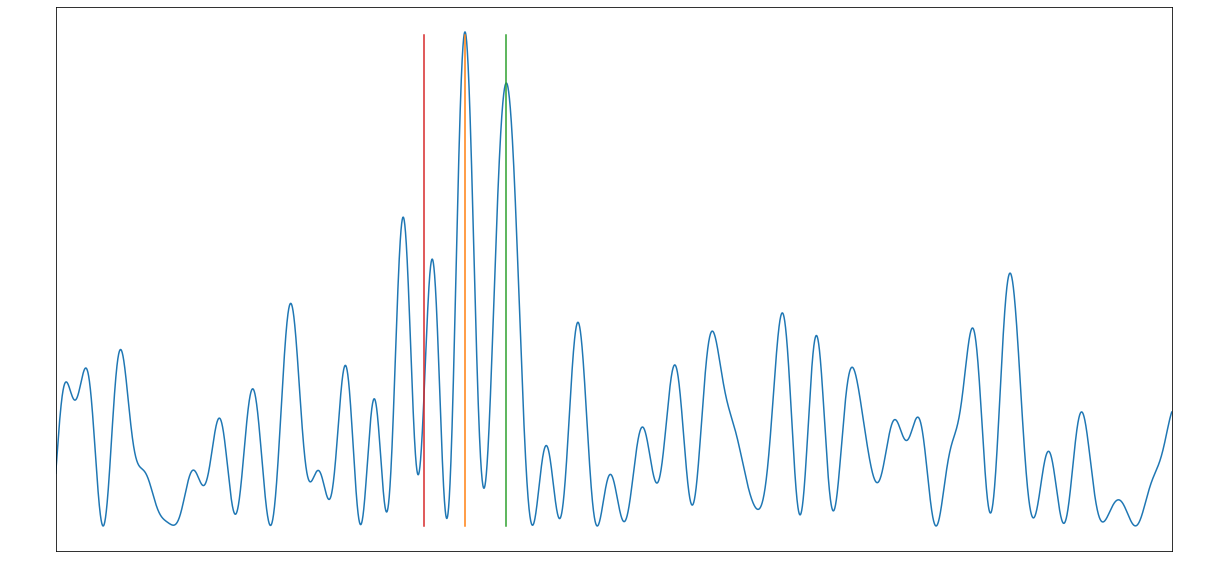

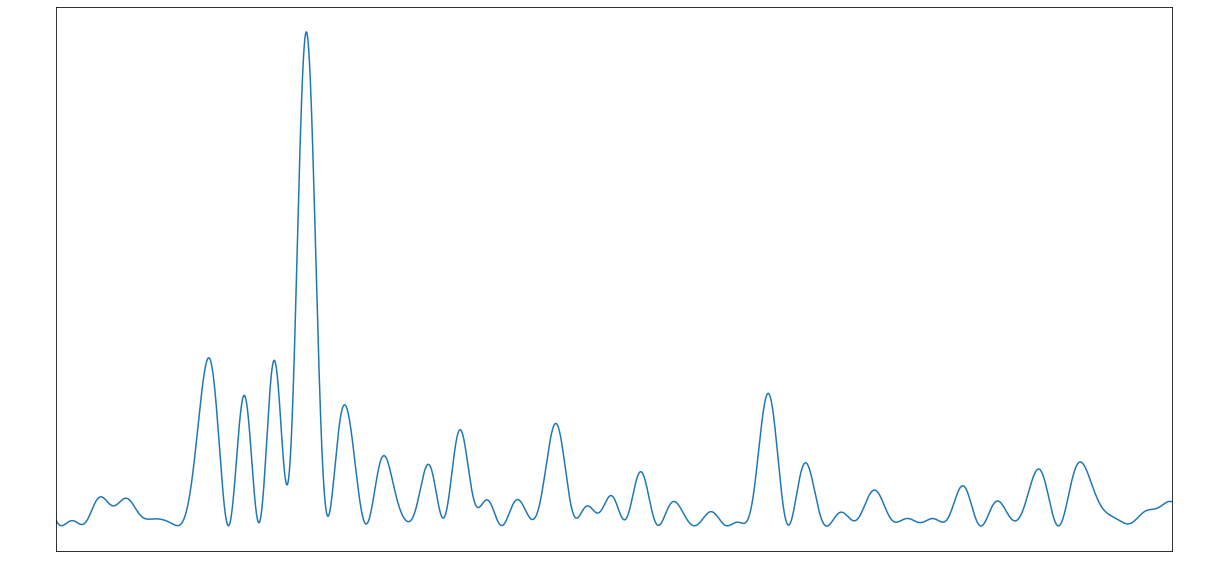

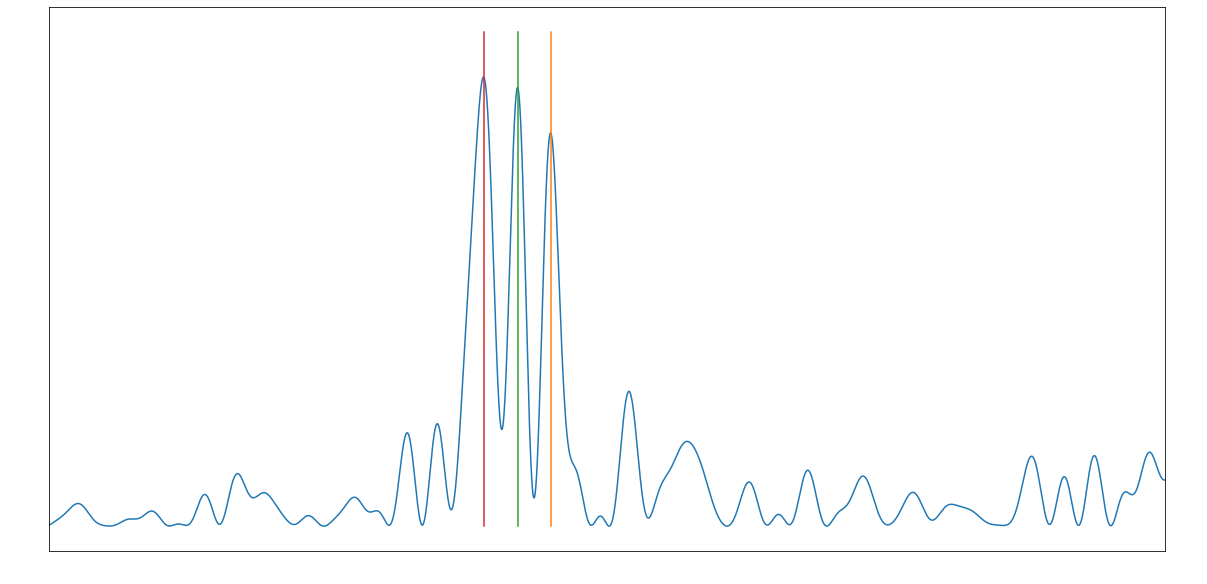

In [90]:
sec30 = search_result[2].download()
sec3 = sec30.PDCSAP_FLUX.remove_nans()
flux = sec3.flux.to_value()
time = sec3.time.mjd
time = time*24*60*60
#freq = np.linspace(800e-6, 3000e-6, 10000)#
freq = np.linspace(1380e-6,1400e-6, 10000)
power = LombScargle(time, flux).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq*1e6,power)
plt.xticks(fontsize=20)

plt.xlim(1380,1400)
plt.plot([1384.9139913991398,1384.9139913991398],[0,0.0035])
plt.plot([1384.9139913991398+1.547654765,1384.9139913991398+1.547654765],[0,0.0035])
plt.plot([1383.3663366336634,1383.3663366336634],[0,0.0035])
plt.show()

freq = np.linspace(1300e-6,1320e-6, 10000)
power = LombScargle(time, flux).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq*1e6,power)
plt.xticks(fontsize=20)
plt.xlim(1300,1320)

freq = np.linspace(1230e-6,1260e-6, 10000)
power = LombScargle(time, flux).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq*1e6,power)
plt.plot([1241.3201320132014,1241.3201320132014],[0,0.0005])
plt.plot([1241.3201320132014+1.204620462,1241.3201320132014+1.204620462],[0,0.0005])
plt.plot([1240.1155115511551,1240.1155115511551],[0,0.0005])
plt.xticks(fontsize=20)
plt.xlim(1230,1260)

freq = np.linspace(1990e-6,2010e-6, 10000)
power = LombScargle(time, flux).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq*1e6,power)
plt.xticks(fontsize=20)
print(freq[np.argmax(power)]*1e6)
plt.plot([1997.3347334733476,1997.3347334733476],[0,0.0001])
plt.plot([1998.0756075607562,1998.0756075607562], [0,0.0001])
plt.plot([1997.3347334733476-0.740874087,1997.3347334733476-0.740874087],[0,0.0001])
plt.xlim(1990,2010)


freq = np.linspace(2300e-6,2320e-6, 10000)
power = LombScargle(time, flux).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq*1e6,power)
plt.xticks(fontsize=20)
plt.xlim(2300,2320)

freq = np.linspace(2690e-6,2710e-6, 10000)
power = LombScargle(time, flux).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq*1e6,power)
plt.xticks(fontsize=20)
plt.xlim(2690,2710)
plt.plot([2698.3912391239123+0.6,2698.3912391239123+0.6],[0,0.00045])
plt.plot([2698.3912391239123,2698.3912391239123],[0,0.00045])
plt.plot([2698.3912391239123-0.6,2698.3912391239123-0.6],[0,0.00045])


/home/nwal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  


2697.780778077808


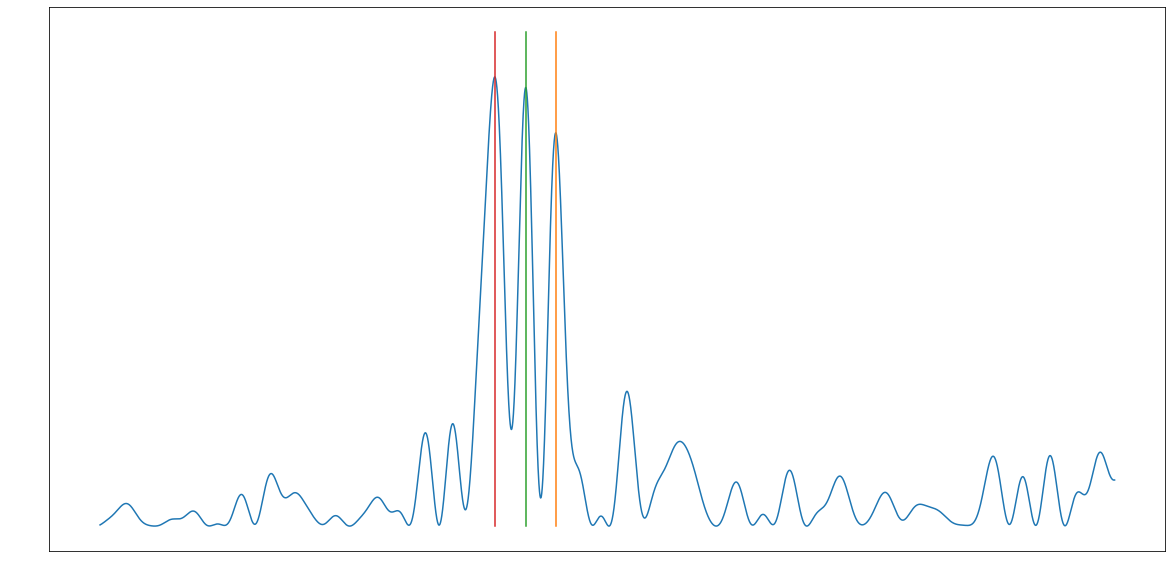

In [66]:
sec30 = search_result[2].download()
sec3 = sec30.PDCSAP_FLUX.remove_nans()
flux = sec3.flux.to_value()
time = sec3.time.mjd
time = time*24*60*60
freq = np.linspace(2690e-6, 2710e-6, 10000)
power = LombScargle(time, flux).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq*1e6,power)
#plt.plot([1305.215e-6,1305.215e-6],[0,0.007])
#plt.plot([1306.980e-6,1306.980e-6],[0,0.007])
#plt.plot([1308.724e-6,1308.724e-6],[0,0.007])
plt.xticks(fontsize=20)
#powerTess = power
#plt.xlim(5,7)
print(freq[np.argmax(power)]*1e6)
#plt.plot([2697.781778177818,2697.781778177818],[0,0.0004])
#plt.plot([2698.3912391239123,2698.3912391239123],[0,0.0004])
#plt.plot([2698.983258325832,2698.983258325832],[0,0.0004])

plt.plot([2698.3912391239123+0.6,2698.3912391239123+0.6],[0,0.00045])
plt.plot([2698.3912391239123,2698.3912391239123],[0,0.00045])
plt.plot([2698.3912391239123-0.6,2698.3912391239123-0.6],[0,0.00045])

dat = np.vstack((freq*1e6, power))
dat = dat.T
np.savetxt('LSGD1400Sec30Triplet.dat', dat, delimiter = '\t')

/home/nwal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  


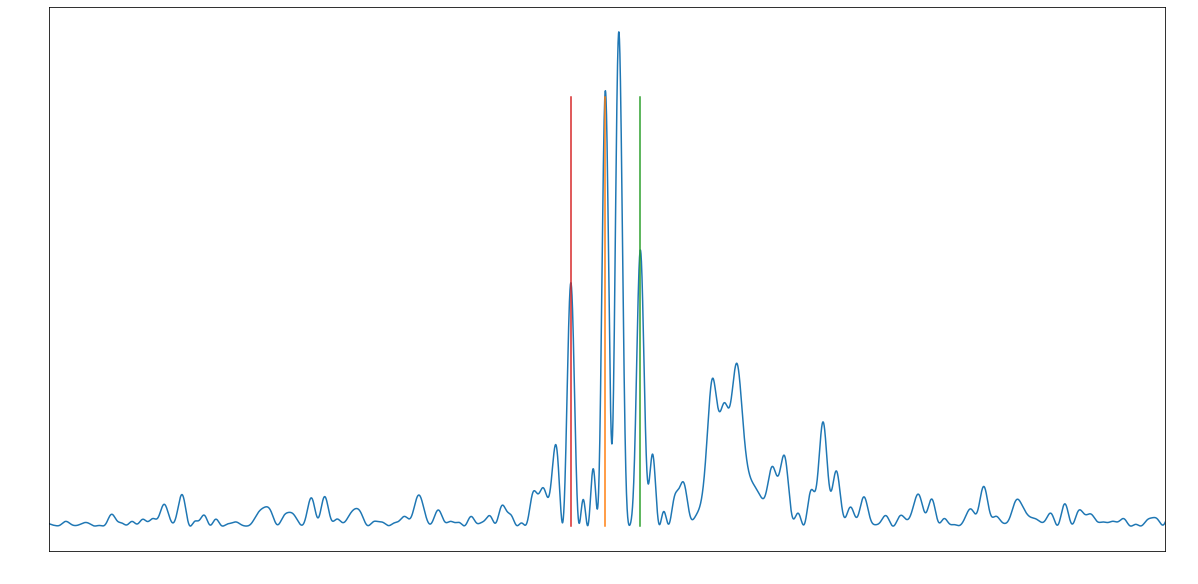

1997.3327332733277


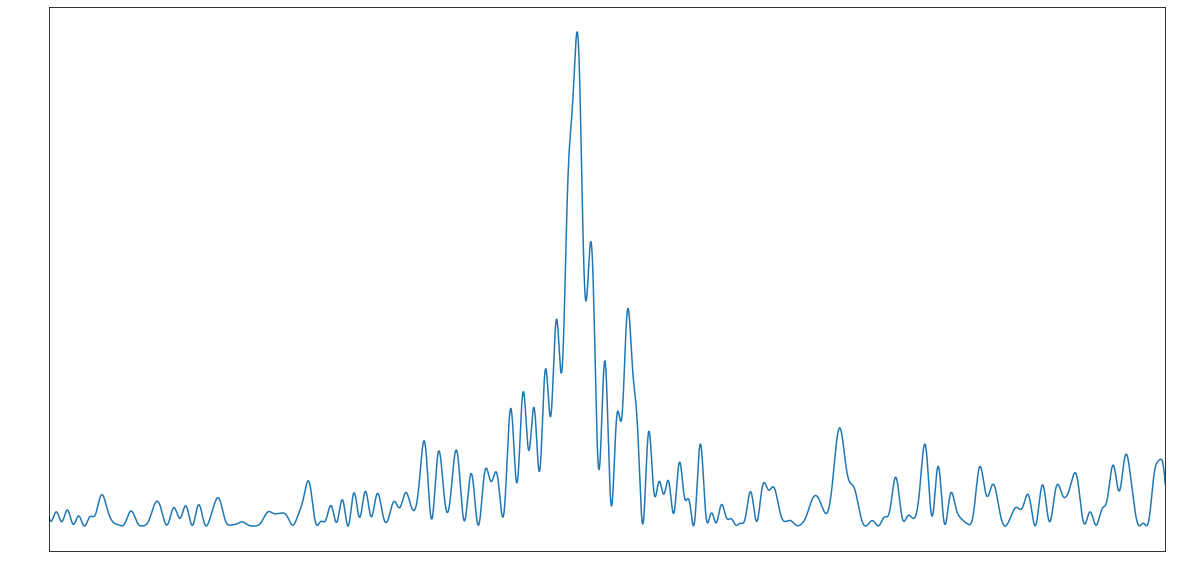

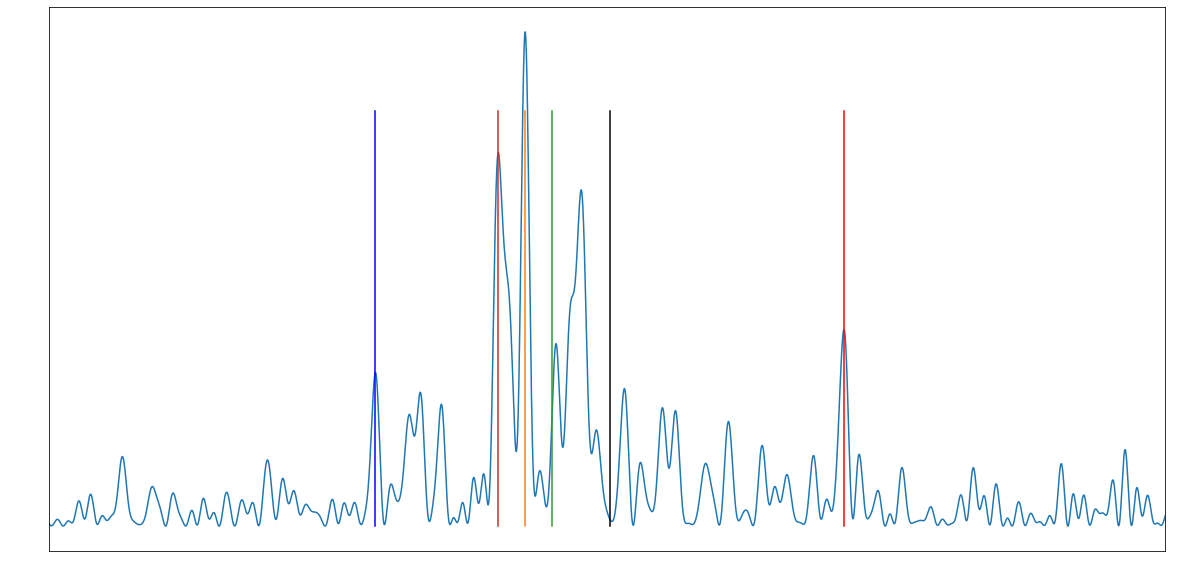

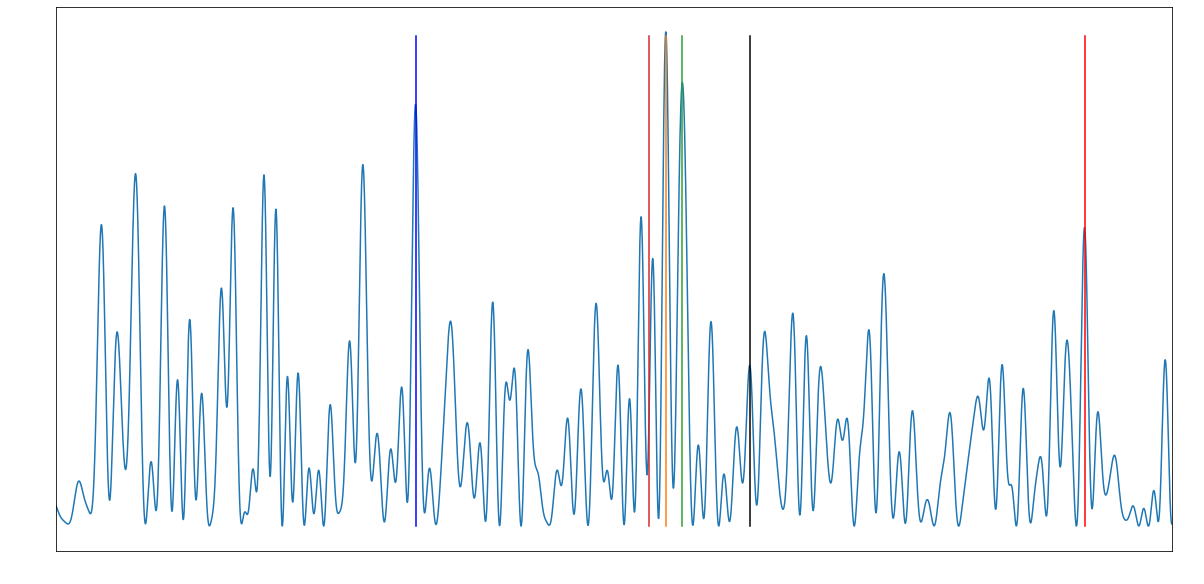

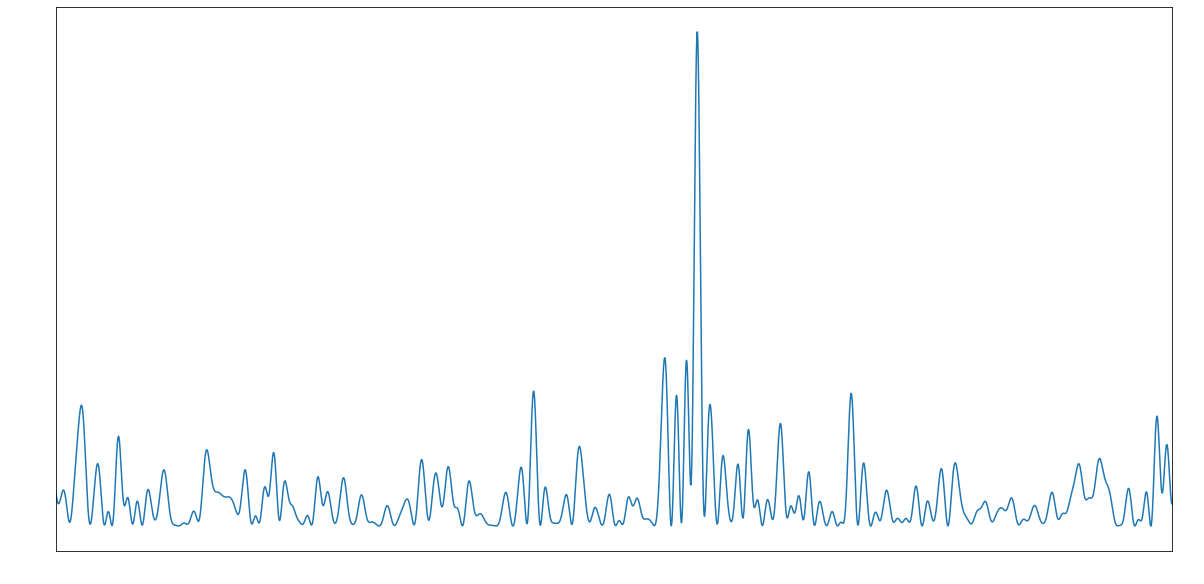

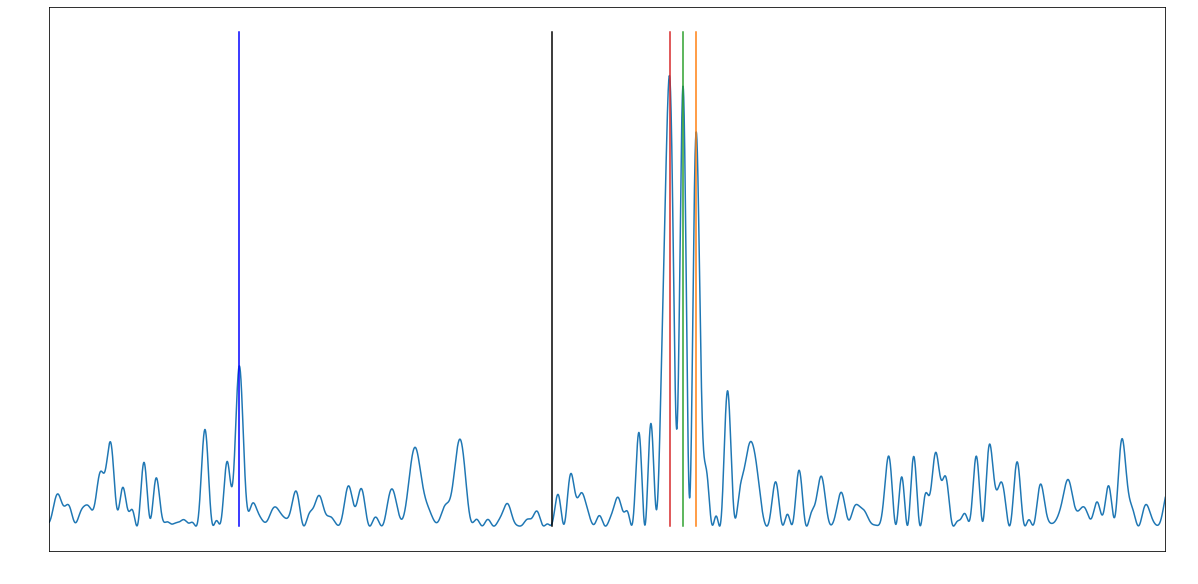

In [118]:
sec30 = search_result[2].download()
sec3 = sec30.PDCSAP_FLUX.remove_nans()
flux = sec3.flux.to_value()
time = sec3.time.mjd
time = time*24*60*60
#freq = np.linspace(800e-6, 3000e-6, 10000)#
freq = np.linspace(1360e-6,1410e-6, 10000)
power = LombScargle(time, flux).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq*1e6,power)
plt.xticks(fontsize=20)

plt.xlim(1360,1410)
plt.plot([1384.9139913991398,1384.9139913991398],[0,0.0035])
plt.plot([1384.9139913991398+1.547654765,1384.9139913991398+1.547654765],[0,0.0035])
plt.plot([1383.3663366336634,1383.3663366336634],[0,0.0035])
plt.show()

freq = np.linspace(1290e-6,1340e-6, 10000)
power = LombScargle(time, flux).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq*1e6,power)
plt.xticks(fontsize=20)
plt.xlim(1290,1340)

freq = np.linspace(1220e-6,1270e-6, 10000)
power = LombScargle(time, flux).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq*1e6,power)
plt.plot([1241.3201320132014,1241.3201320132014],[0,0.0005])
plt.plot([1241.3201320132014+1.204620462,1241.3201320132014+1.204620462],[0,0.0005])
plt.plot([1240.1155115511551,1240.1155115511551],[0,0.0005])
plt.plot([1234.6124612461247,1234.6124612461247],[0,0.0005], c='b')
plt.plot([1255.6025602560255,1255.6025602560255],[0,0.0005], c='r')
plt.plot([1245.107510751,1245.107510751],[0,0.0005], c='k')
plt.xticks(fontsize=20)
plt.xlim(1220,1270)

freq = np.linspace(1970e-6,2020e-6, 10000)
power = LombScargle(time, flux).power(freq)
print(freq[np.argmax(power)]*1e6)
plt.figure(figsize=(20,10))
plt.plot(freq*1e6,power)
plt.xticks(fontsize=20)
plt.plot([1997.3347334733476,1997.3347334733476],[0,0.0001])
plt.plot([1998.0756075607562,1998.0756075607562], [0,0.0001])
plt.plot([1986.1216121612163,1986.1216121612163],[0,0.0001], c='b')
plt.plot([1986.1216121612163+14.98649865,1986.1216121612163+14.98649865],[0,0.0001],c='k')
plt.plot([2016.094609460946,2016.094609460946],[0,0.0001], c='r')
plt.plot([1997.3347334733476-0.740874087,1997.3347334733476-0.740874087],[0,0.0001])
plt.xlim(1970,2020)


freq = np.linspace(2270e-6,2330e-6, 10000)
power = LombScargle(time, flux).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq*1e6,power)
plt.xticks(fontsize=20)
plt.xlim(2270,2330)

freq = np.linspace(2670e-6,2720e-6, 10000)
power = LombScargle(time, flux).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq*1e6,power)
plt.xticks(fontsize=20)
plt.xlim(2670,2720)
plt.plot([2698.3912391239123+0.6,2698.3912391239123+0.6],[0,0.00045])
plt.plot([2698.3912391239123,2698.3912391239123],[0,0.00045])
plt.plot([2698.3912391239123-0.6,2698.3912391239123-0.6],[0,0.00045])
#print(freq[np.argmax(power)]*1e6)
plt.plot([2678.5138513851384,2678.5138513851384],[0,0.00045], c='b')
plt.plot([2678.5138513851384+14,2678.5138513851384+14],[0,0.00045], c='k')

In [70]:
(1/((0.5920192019198112+0.6094609460942593)*1e-6/2))/60/60/24/2

#9.6

9.633179618660277

In [84]:
1.547654765

(1/(1.547654765*1e-6))/60/60/24/2


3.7392299419160433

In [120]:
1.547654765

((1/(14.98649865*1e-6))/60/60/24/2)*24
#0.415416667

################look for this splitting

9.26760093418411

In [ ]:
sec30 = search_result[2].download()
sec3 = sec30.PDCSAP_FLUX.remove_nans()
flux = sec3.flux.to_value()
time = sec3.time.mjd
time = time*24*60*60
freq = np.linspace(800e-6, 3500e-6, 10000)
power = LombScargle(time, flux).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq*1e6,power)
#plt.plot([1305.215e-6,1305.215e-6],[0,0.007])
#plt.plot([1306.980e-6,1306.980e-6],[0,0.007])
#plt.plot([1308.724e-6,1308.724e-6],[0,0.007])
plt.xticks(fontsize=20)
#powerTess = power
#plt.xlim(5,7)

0
0


/home/nwal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  """Entry point for launching an IPython kernel.


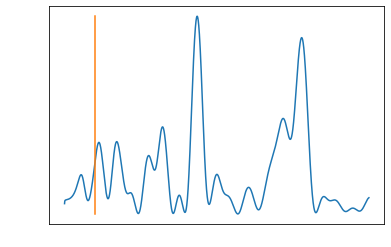

In [9]:
sec3 = sec30.PDCSAP_FLUX.remove_nans()
flux = sec3.flux.to_value()
time = sec3.time.mjd
freq = np.linspace(0.001, 1, 10000)
power = LombScargle(time, flux).power(freq)
plt.plot(freq,power)
print(np.isnan(time).sum())
print(np.isnan(flux).sum())
plt.plot([1/9.98,1/9.98],[0,max(power)])
#powerTess = power


/home/nwal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  """Entry point for launching an IPython kernel.


ValueError: setting an array element with a sequence.

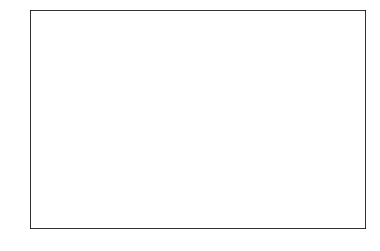

In [10]:
sec3P = sec3.PDCSAP_FLUX
len(sec3P.flux)

plt.plot(sec3P.time[:1000],sec3P.flux[:1000], 'kx')
plt.show()

plt.plot(sec3P.time[1000:2000],sec3P.flux[1000:2000], 'kx')
plt.show()

plt.plot(sec3P.time[2000:3000],sec3P.flux[2000:3000], 'kx')
plt.show()

plt.plot(sec3P.time[3000:4000],sec3P.flux[3000:4000], 'kx')
plt.show()

plt.plot(sec3P.time[4000:5000],sec3P.flux[4000:5000], 'kx')
plt.show()

plt.plot(sec3P.time[5000:6000],sec3P.flux[5000:6000], 'kx')
plt.show()

plt.plot(sec3P.time[6000:7000],sec3P.flux[6000:7000], 'kx')
plt.show()


plt.plot(sec3P.time[7000:8000],sec3P.flux[7000:8000], 'kx')
plt.show()

plt.plot(sec3P.time[8000:9000],sec3P.flux[8000:9000], 'kx')
plt.show()

plt.plot(sec3P.time[9000:10000],sec3P.flux[9000:10000], 'kx')
plt.show()


plt.plot(sec3P.time[10000:11000],sec3P.flux[10000:11000], 'kx')
plt.show()


plt.plot(sec3P.time[11000:12000],sec3P.flux[11000:12000], 'kx')
plt.show()


plt.plot(sec3P.time[12000:13000],sec3P.flux[12000:13000], 'kx')
plt.show()


plt.plot(sec3P.time[13000:],sec3P.flux[13000:], 'kx')
plt.show()

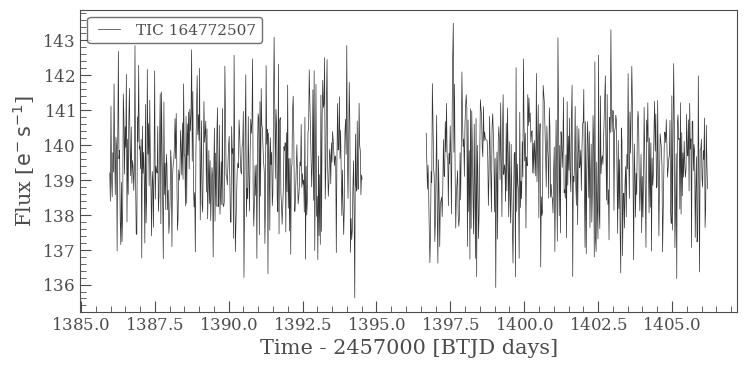

In [11]:
sec30 = search_result[1].download()
sec30.plot()

0
0


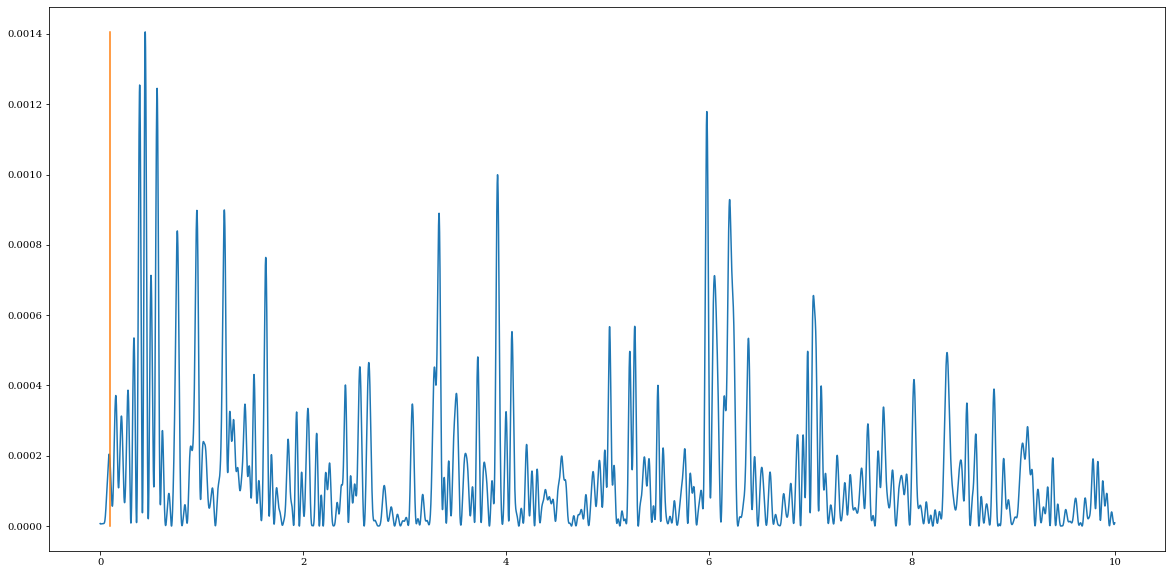

In [25]:
sec3 = sec30.PDCSAP_FLUX.remove_nans()
flux = sec3.flux
time = sec3.time
freq = np.linspace(0.001, 10, 10000)
power = LombScargle(time, flux).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power)
print(np.isnan(time).sum())
print(np.isnan(flux).sum())
plt.plot([1/9.98,1/9.98],[0,max(power)])
#powerTess = power
#plt.xlim(5,7)

/home/nwal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  


(array([0.001285, 0.00129 , 0.001295, 0.0013  , 0.001305, 0.00131 ,
        0.001315, 0.00132 , 0.001325, 0.00133 ]),
 <a list of 10 Text xticklabel objects>)

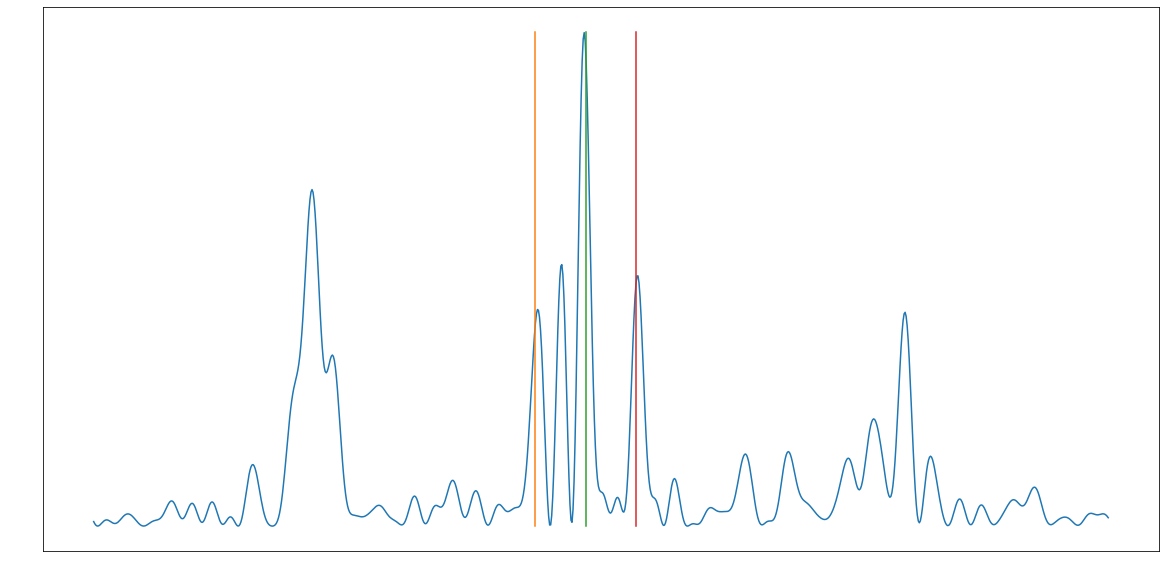

In [12]:
sec30 = search_result[0].download()
sec3 = sec30.PDCSAP_FLUX.remove_nans()
flux = sec3.flux.to_value()
time = sec3.time.mjd
time = time*24*60*60
freq = np.linspace(1290e-6, 1325e-6, 1000)
power = LombScargle(time, flux).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power)
plt.plot([1305.215e-6,1305.215e-6],[0,0.007])
plt.plot([1306.980e-6,1306.980e-6],[0,0.007])
plt.plot([1308.724e-6,1308.724e-6],[0,0.007])
plt.xticks(fontsize=20)
#powerTess = power
#plt.xlim(5,7)

/home/nwal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  


(array([2190., 2195., 2200., 2205., 2210., 2215., 2220., 2225., 2230.]),
 <a list of 9 Text xticklabel objects>)

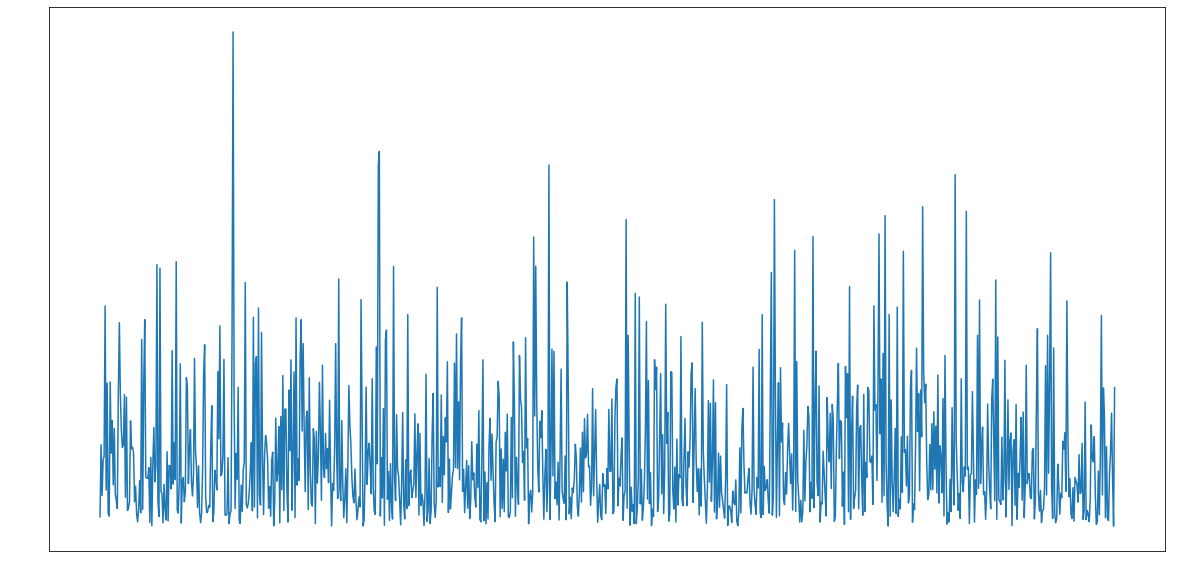

In [13]:
sec30 = search_result[0].download()
sec3 = sec30.PDCSAP_FLUX.remove_nans()
flux = sec3.flux.to_value()
time = sec3.time.mjd
time = time*24*60*60
freq = np.linspace(2200-6, 2230-6, 1000)
power = LombScargle(time, flux).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power)
#plt.plot([1305.215e-6,1305.215e-6],[0,0.007])
#plt.plot([1306.980e-6,1306.980e-6],[0,0.007])
#plt.plot([1308.724e-6,1308.724e-6],[0,0.007])
plt.xticks(fontsize=20)
#powerTess = power
#plt.xlim(5,7)

(array([0.001285, 0.00129 , 0.001295, 0.0013  , 0.001305, 0.00131 ,
        0.001315, 0.00132 , 0.001325, 0.00133 ]),
 <a list of 10 Text xticklabel objects>)

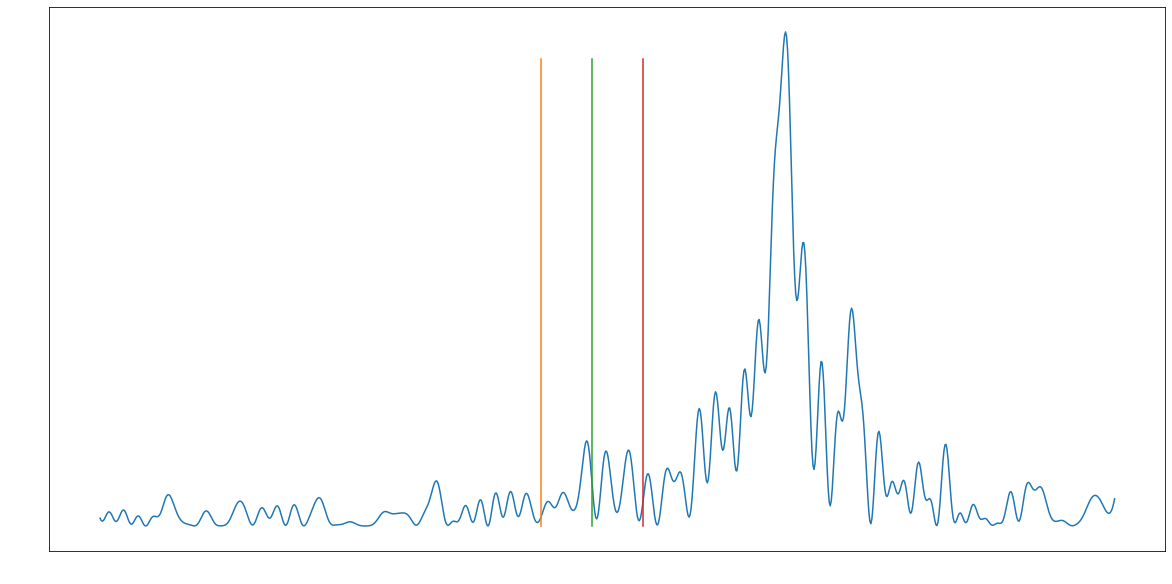

In [4]:
sec30 = search_result[1].download()
sec3 = sec30.PDCSAP_FLUX.remove_nans()
flux = sec3.flux
time = sec3.time
time = time*24*60*60
freq = np.linspace(1290e-6, 1325e-6, 1000)
power = LombScargle(time, flux).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power)
plt.plot([1305.215e-6,1305.215e-6],[0,0.001])
plt.plot([1306.980e-6,1306.980e-6],[0,0.001])
plt.plot([1308.724e-6,1308.724e-6],[0,0.001])
plt.xticks(fontsize=20)
#powerTess = power
#plt.xlim(5,7)

0.41420878210439105


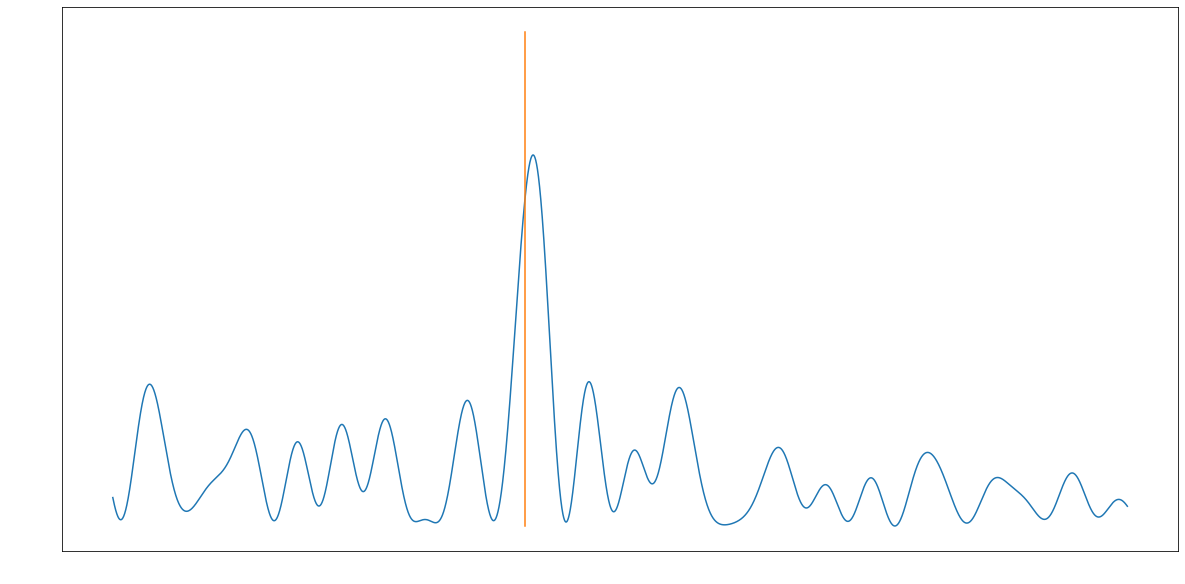

In [27]:

sec30 = search_result[1].download()
sec3 = sec30.PDCSAP_FLUX.remove_nans()
flux = sec3.flux
time = sec3.time
freq = np.linspace(2, 3, 10000)
power = LombScargle(time, flux).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power)
plt.plot([1/0.41555740432612315,1/0.41555740432612315],[0,0.0002])
plt.xticks(fontsize=20)
print(1/freq[np.argmax(power)])
#powerTess = power
#plt.xlim(5,7)

Text(0.5, 0, 'Frequency, 1/d')

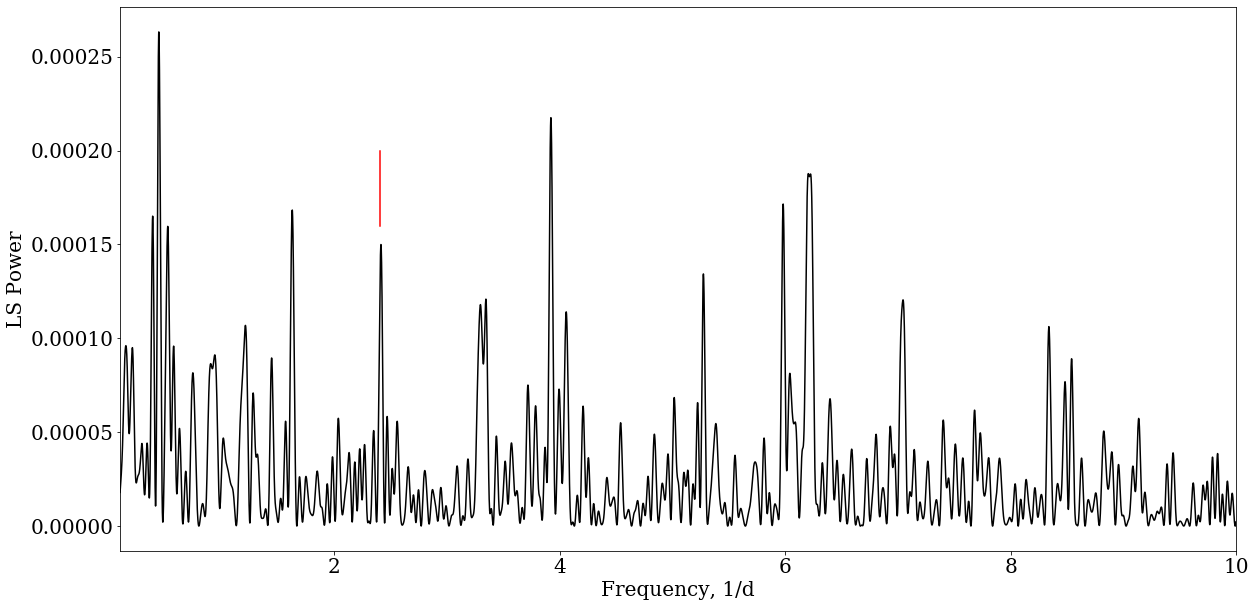

In [16]:

sec30 = search_result[1].download()
sec3 = sec30.PDCSAP_FLUX.remove_nans()
flux = sec3.flux
time = sec3.time
freq = np.linspace(0.1, 10, 10000)
power = LombScargle(time, flux).power(freq)
plt.rc('xtick',c='k')
plt.rc('ytick',c='k')
plt.figure(figsize=(20,10))
plt.plot([1/0.41555740432612315,1/0.41555740432612315],[0.00016,0.0002], c='r')
plt.plot(freq,power, c='k')
plt.xlim(0.1,10)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('LS Power', fontsize=20)
plt.xlabel('Frequency, 1/d', fontsize=20)
#powerTess = power
#plt.xlim(5,7)



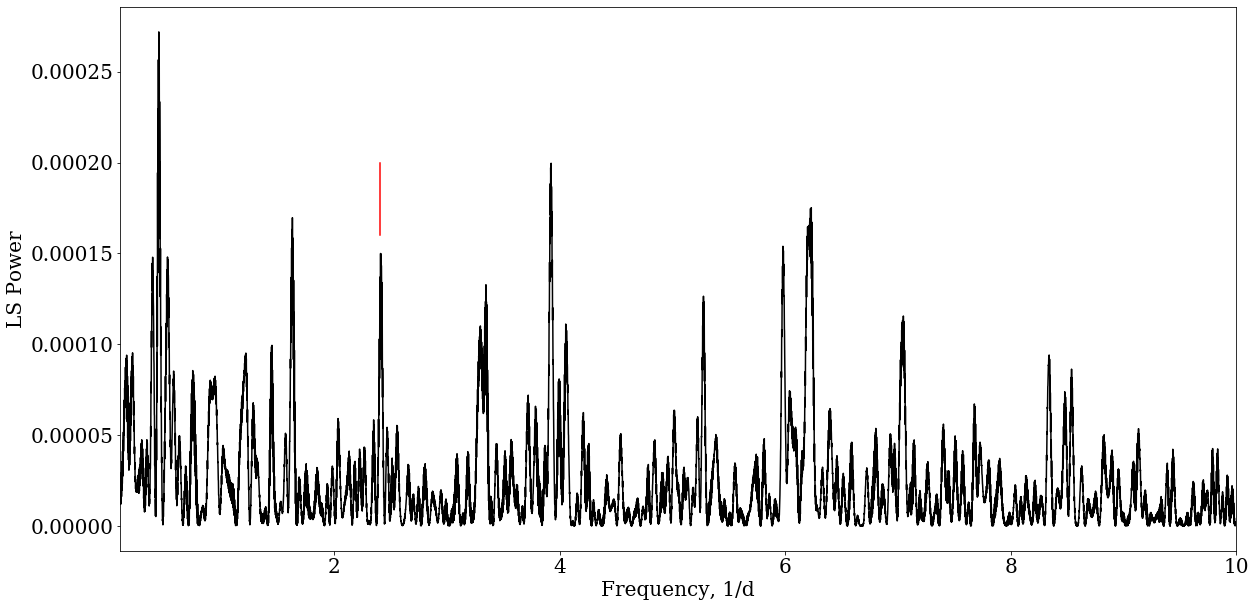

In [21]:

sec30 = search_result[0].download()
sec3 = sec30.PDCSAP_FLUX.remove_nans()
flux = sec3.flux
time = sec3.time
fluxHold = flux/np.median(flux)
timeHold = time


sec30 = search_result[1].download()
sec3 = sec30.PDCSAP_FLUX.remove_nans()
flux = sec3.flux
time = sec3.time
flux = flux/np.median(flux)
flux = np.concatenate((fluxHold,flux))
time = np.concatenate((timeHold, time))

freq = np.linspace(0.1, 10, 10000)
power = LombScargle(time, flux).power(freq)
plt.rc('xtick',c='k')
plt.rc('ytick',c='k')
plt.figure(figsize=(20,10))
plt.plot([1/0.41555740432612315,1/0.41555740432612315],[0.00016,0.0002], c='r')
plt.plot(freq,power, c='k')
plt.xlim(0.1,10)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('LS Power', fontsize=20)
plt.xlabel('Frequency, 1/d', fontsize=20)
#powerTess = power
#plt.xlim(5,7)
plt.savefig('GD1400TESSAll.pdf')


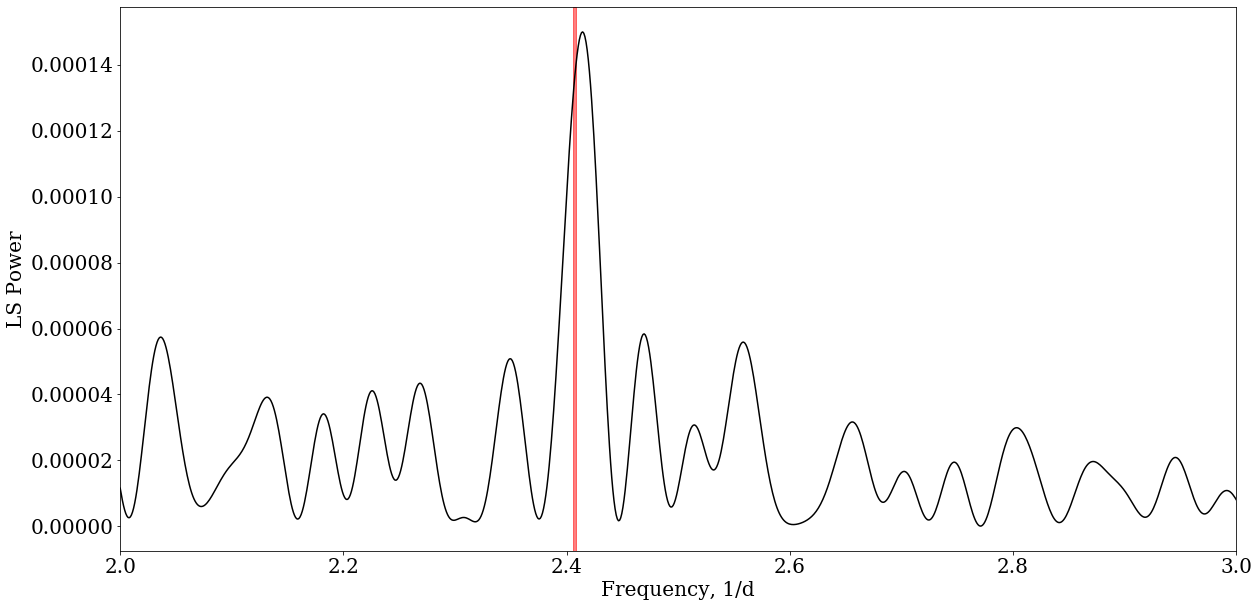

In [25]:

#sec30 = search_result[0].download()
#sec3 = sec30.PDCSAP_FLUX.remove_nans()
#flux = sec3.flux
#time = sec3.time
#fluxHold = flux/np.median(flux)
#timeHold = time


sec30 = search_result[1].download()
sec3 = sec30.PDCSAP_FLUX.remove_nans()
flux = sec3.flux
time = sec3.time
flux = flux/np.median(flux)
#flux = np.concatenate((fluxHold,flux))
#time = np.concatenate((timeHold, time))

freq = np.linspace(2, 3, 1000)
power = LombScargle(time, flux).power(freq)
plt.rc('xtick',c='k')
plt.rc('ytick',c='k')
plt.figure(figsize=(20,10))
#plt.plot([1/0.4156,1/0.4156],[0.00016,0.0002], c='r')
#plt.plot([1/0.416,1/0.416],[0.00016,0.0002], c='r')
#plt.plot([1/0.4152,1/0.4152],[0.00016,0.0002], c='r')

plt.axvspan(1/0.4156, 1/0.4152, alpha=0.5, color='red')
plt.plot(freq,power, c='k')
plt.xlim(2,3)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('LS Power', fontsize=20)
plt.xlabel('Frequency, 1/d', fontsize=20)
#powerTess = power
#plt.xlim(5,7)
plt.savefig('GD1400TESSAllZoom.pdf')


(array([0.0005 , 0.00075, 0.001  , 0.00125, 0.0015 , 0.00175, 0.002  ,
        0.00225, 0.0025 , 0.00275, 0.003  ]),
 <a list of 11 Text xticklabel objects>)

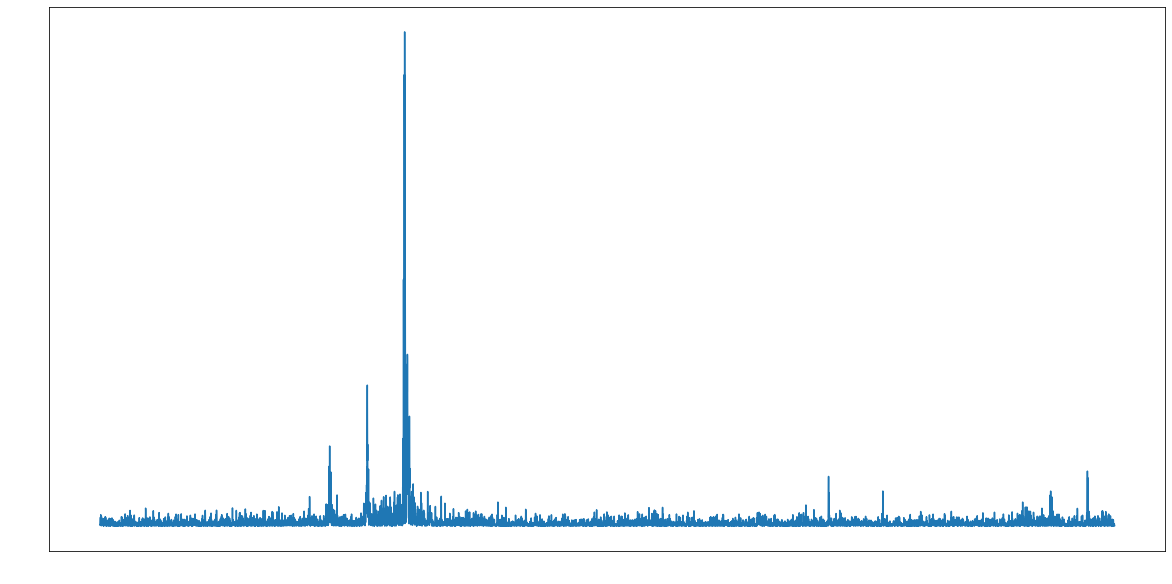

In [14]:
sec30 = search_result[1].download()
sec3 = sec30.PDCSAP_FLUX.remove_nans()
flux = sec3.flux
time = sec3.time
time = time*24*60*60
freq = np.linspace(800e-6, 2750e-6, 10000)
power = LombScargle(time, flux).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power)

plt.xticks(fontsize=20)
#powerTess = power
#plt.xlim(5,7)

(array([0.001355, 0.00136 , 0.001365, 0.00137 , 0.001375, 0.00138 ,
        0.001385, 0.00139 , 0.001395, 0.0014  , 0.001405]),
 <a list of 11 Text xticklabel objects>)

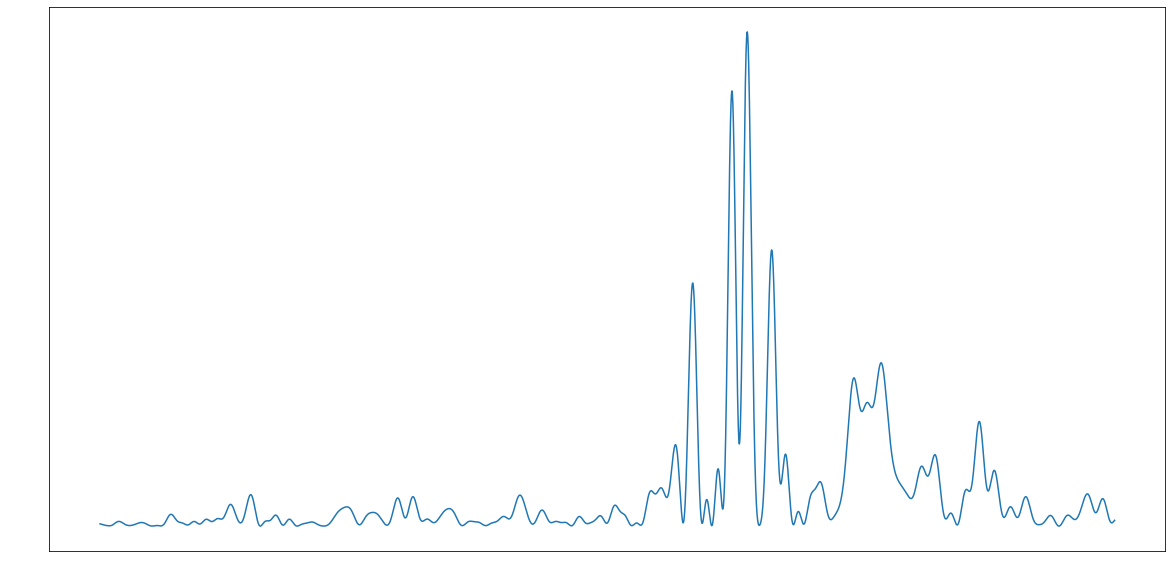

In [18]:
sec30 = search_result[1].download()
sec3 = sec30.PDCSAP_FLUX.remove_nans()
flux = sec3.flux
time = sec3.time
time = time*24*60*60
freq = np.linspace(1360e-6, 1400e-6, 10000)
power = LombScargle(time, flux).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power)

plt.xticks(fontsize=20)
#powerTess = power
#plt.xlim(5,7)

0
0


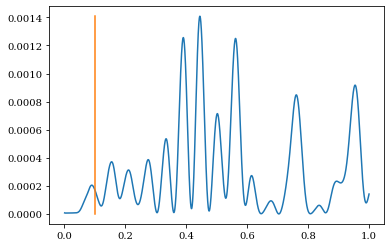

In [15]:
sec30 = search_result[2].download()

sec3 = sec30.PDCSAP_FLUX.remove_nans()
flux = sec3.flux
time = sec3.time
freq = np.linspace(0.001, 1, 10000)
power = LombScargle(time, flux).power(freq)
plt.plot(freq,power)
print(np.isnan(time).sum())
print(np.isnan(flux).sum())
plt.plot([1/9.98,1/9.98],[0,max(power)])
#powerTess = power


#### plt.plot(sec30P.time[:1000],sec30P.flux[:1000],'kx')
plt.show()
for i in range(1,111):
    start = i*1000
    finish = start+1000
    plt.plot(sec30P.time[start:finish],sec30P.flux[start:finish],'kx')
    plt.show()
plt.plot(sec30P.time[112000:],sec30P.flux[112000:],'kx')
plt.show()

2.4786486648664865


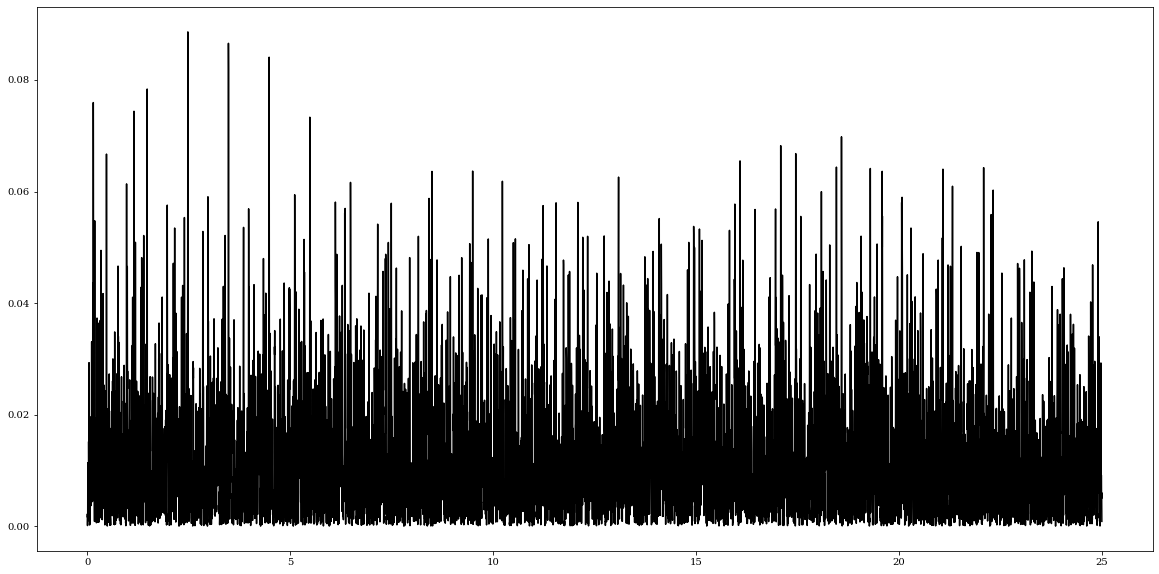

0.12768586858685868


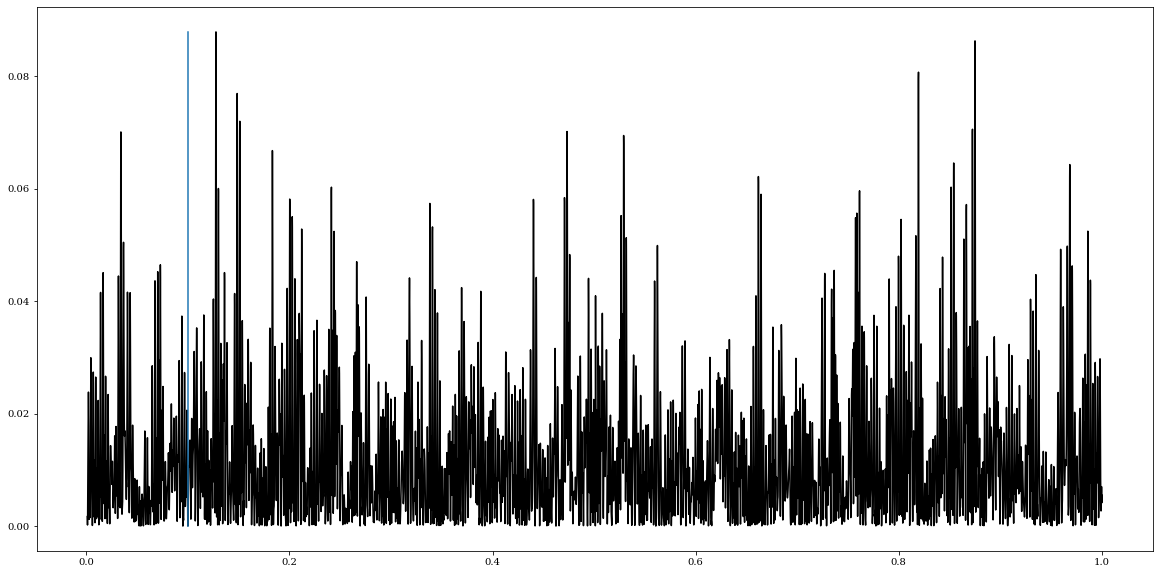

In [21]:
data1 = pd.read_csv('gd14ztf/g1.csv', delimiter=',')
data1 = data1[data1["catflags"] < 1]
timeZTF1 = data1['mjd']
fluxZTF1 = data1['mag']
fluxZTF1Old = fluxZTF1
zeroMag = data1['magzp']
#fluxZTF1 = 30/(10**((-fluxZTF1+zeroMag)/2.5))
timeZTF1 = timeZTF1#-2457000
#fluxZTF1 = (10**((-fluxZTF1)))
#fluxZTF1 = 1000/(10**((fluxZTF1+26.74)/2.5))
#fluxZTF1 = 30*10**((zeroMag-fluxZTF1)/2.5)
fluxZTF1 = 3.631*(10**(-fluxZTF1/2.5))#jay's way
fluxZTF1 = (fluxZTF1/np.mean(fluxZTF1))-1
freq = np.linspace(0.001, 25, 10000)
powerPl = LombScargle(timeZTF1,fluxZTF1).power(freq)
plt.figure(figsize=(20,10))
#plt.plot([12.45,12.45], [0,max(powerPl)])
plt.plot(freq,powerPl, c='k')
print(freq[np.argmax(powerPl)])

powerZTFG = powerPl
plt.show()
freq = np.linspace(0.001, 1, 10000)
powerPl = LombScargle(timeZTF1,fluxZTF1).power(freq)
plt.figure(figsize=(20,10))
#plt.plot([12.45,12.45], [0,max(powerPl)])
plt.plot(freq,powerPl, c='k')
plt.plot([1/9.98,1/9.98],[0,max(powerPl)])
print(freq[np.argmax(powerPl)])


21.107266426642664


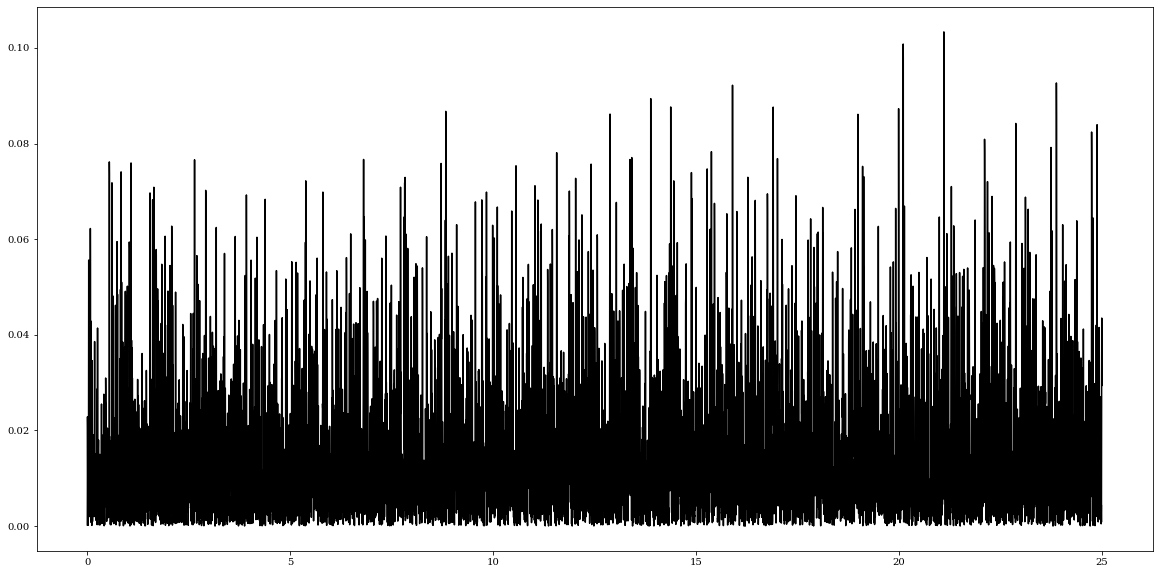

0.9155760576057607


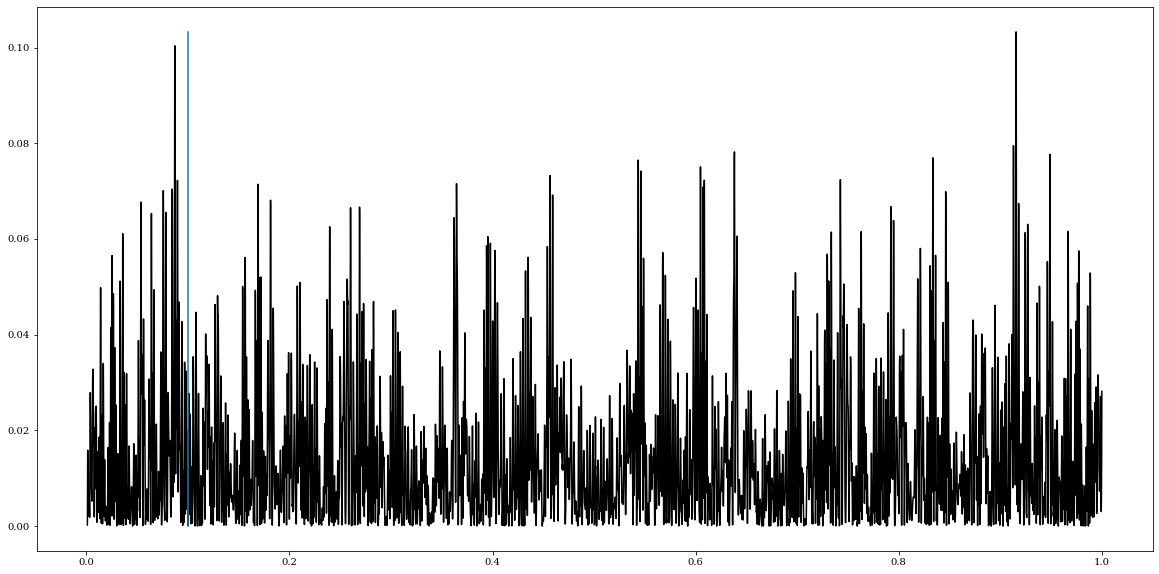

In [22]:
data1 = pd.read_csv('gd14ztf/r1.csv', delimiter=',')
data1 = data1[data1["catflags"] < 1]
timeZTF1 = data1['mjd']
fluxZTF1 = data1['mag']
fluxZTF1Old = fluxZTF1
zeroMag = data1['magzp']
#fluxZTF1 = 30/(10**((-fluxZTF1+zeroMag)/2.5))
timeZTF1 = timeZTF1#-2457000
#fluxZTF1 = (10**((-fluxZTF1)))
#fluxZTF1 = 1000/(10**((fluxZTF1+26.74)/2.5))
#fluxZTF1 = 30*10**((zeroMag-fluxZTF1)/2.5)
fluxZTF1 = 3.631*(10**(-fluxZTF1/2.5))#jay's way
fluxZTF1 = (fluxZTF1/np.mean(fluxZTF1))-1
freq = np.linspace(0.001, 25, 10000)
powerPl = LombScargle(timeZTF1,fluxZTF1).power(freq)
plt.figure(figsize=(20,10))
#plt.plot([12.45,12.45], [0,max(powerPl)])
plt.plot(freq,powerPl, c='k')
print(freq[np.argmax(powerPl)])

powerZTFG = powerPl
plt.show()
freq = np.linspace(0.001, 1, 10000)
powerPl = LombScargle(timeZTF1,fluxZTF1).power(freq)
plt.figure(figsize=(20,10))
#plt.plot([12.45,12.45], [0,max(powerPl)])
plt.plot(freq,powerPl, c='k')
plt.plot([1/9.98,1/9.98],[0,max(powerPl)])
print(freq[np.argmax(powerPl)])
